# Business Objectives:
This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).

## Importing Libraries & Modules 

In [1]:
# Importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# Suppressing Warnings

import warnings
warnings.filterwarnings("ignore")

## Reading the provided datasets

In [3]:
pwd

'C:\\Users\\Admin\\Downloads\\PGDDS @ UpGrad\\Credit EDA Case Study'

In [4]:
# Loading application_data.csv to dataframe "app_data" and previous_application.csv to dataframe "prev"

app_data = pd.read_csv("application_data.csv")
prev = pd.read_csv("previous_application.csv")

In [5]:
# Displaying & checking the first 5 rows of the application_data set

app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Displaying & checking the first 5 rows of the previous_application dataset

prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Describing the applcation_data set

app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [8]:
# Describing the previous_applcation dataset

prev.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [9]:
# Checking the application_data set's columnn information

app_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [10]:
# Checking the previous_application dataset's columnn information

prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [11]:
# Printing the shape of application_data set

app_data.shape

(307511, 122)

In [12]:
# Printing the shape of previous_application dataset

prev.shape

(1670214, 37)

#### Analysis:

##### application_data
1. application_data set has 121 columns, 1 target variable and 307511 rows
2. There are 16 columns which is of variable character or Object datatype and 106 numeric columns out of which 65 columns have float datatype & 41 columns have integer datatype
3. In these 122 columns, 55 columns do not have any null values

##### previous_application
1. previous_application has 37 columns and 1670214 rows
2. There are 16 columns which is of variable character or Object datatype and 21 numeric columns out of which 15 columns have float datatype & 6 columns have integer datatype
3. In these 37 columns, 21 columns do not have any null values

## Data Cleaning

In [13]:
# Finding out the percentage of missing values for the columns in the dataframes "application_data" and "previous_application"
# and loading it into separate data frame "miss_app_data" & "miss_prev" respectively using the function "miss_val_percent"

def miss_val_percent(ds):
    miss_val = pd.DataFrame(columns = ["Category","Percentage"])
    
    for columns in ds.columns:
        if ds[columns].isna().values.any():
            percent_val = 100 * ds[columns].isna().sum() /  ds.shape[0]
            miss_val = miss_val.append({"Category": columns,"Percentage":percent_val}, ignore_index=True)
    return miss_val

In [14]:
miss_app_data = miss_val_percent(app_data)

In [15]:
# Sorting the bottom 41 values based on percentage

miss_app_data.sort_values("Percentage").tail(41)

,Category,Percentage
52,HOUSETYPE_MODE,50.176091
20,LIVINGAREA_AVG,50.193326
34,LIVINGAREA_MODE,50.193326
48,LIVINGAREA_MEDI,50.193326
43,ENTRANCES_MEDI,50.348768
15,ENTRANCES_AVG,50.348768
29,ENTRANCES_MODE,50.348768
9,APARTMENTS_AVG,50.749729
23,APARTMENTS_MODE,50.749729
37,APARTMENTS_MEDI,50.749729


#### Analysis

1. There are 67 columns that have missing values
2. There are 41 columns that has missing value more than 50 percent and thus we can drop these columns
3. The rows under the columns "DAYS_LAST_PHONE_CHANGE", "CNT_FAM_MEMBERS", "AMT_ANNUITY", "AMT_GOODS_PRICE", "EXT_SOURCE_2", "DEF_60_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_30_CNT_SOCIAL_CIRCLE" & "NAME_TYPE_SUITE" can either be dropped where there is missing data as the percentage of missing data is less than 1% and wont impact the desired outcome 

    ###### app_data.dropna(subset=[ "DAYS_LAST_PHONE_CHANGE", "CNT_FAM_MEMBERS", "AMT_ANNUITY", "AMT_GOODS_PRICE", "EXT_SOURCE_2", "DEF_60_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_30_CNT_SOCIAL_CIRCLE", "NAME_TYPE_SUITE"], inplace= True)

   or we can replace the null values with the mean of all the data present in the columns "DAYS_LAST_PHONE_CHANGE", "CNT_FAM_MEMBERS", "AMT_ANNUITY", "AMT_GOODS_PRICE", "EXT_SOURCE_2","DEF_60_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_30_CNT_SOCIAL_CIRCLE" and replace the null value with the mode of all the data present in the column "NAME_TYPE_SUITE"

In [16]:
# Adding the bottom 41 percentage value to the data frame "miss_value"

miss_value = miss_app_data.sort_values("Percentage").tail(41)

In [17]:
# Creating an array based on the category

miss = miss_value["Category"].unique()
miss

array(['HOUSETYPE_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MODE',
       'LIVINGAREA_MEDI', 'ENTRANCES_MEDI', 'ENTRANCES_AVG',
       'ENTRANCES_MODE', 'APARTMENTS_AVG', 'APARTMENTS_MODE',
       'APARTMENTS_MEDI', 'WALLSMATERIAL_MODE', 'ELEVATORS_AVG',
       'ELEVATORS_MEDI', 'ELEVATORS_MODE', 'NONLIVINGAREA_MEDI',
       'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'EXT_SOURCE_1',
       'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE',
       'LANDAREA_MODE', 'LANDAREA_MEDI', 'LANDAREA_AVG', 'OWN_CAR_AGE',
       'YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_AVG',
       'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'FLOORSMIN_AVG',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAPARTMENTS_AVG', 'COMMONAREA_MODE', 'COMMONAREA_AVG',
       'COMMONAREA_MEDI'], dtype=object)

In [18]:
# Dropping the above columns

app_data.drop(miss, axis=1, inplace=True)

In [19]:
# Displaying the columns that are left in application_data set

app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
miss_prev = miss_val_percent(prev)

In [21]:
# Sorting the percentage values based percentage in asscending order

miss_prev.sort_values("Percentage")

,Category,Percentage
1,AMT_CREDIT,0.000060
9,PRODUCT_COMBINATION,0.020716
8,CNT_PAYMENT,22.286366
0,AMT_ANNUITY,22.286665
3,AMT_GOODS_PRICE,23.081773
10,DAYS_FIRST_DRAWING,40.298129
11,DAYS_FIRST_DUE,40.298129
12,DAYS_LAST_DUE_1ST_VERSION,40.298129
13,DAYS_LAST_DUE,40.298129
14,DAYS_TERMINATION,40.298129


#### Analysis

1. There are 16 columns that have missing values
2. There are 4 columns "AMT_DOWN_PAYMENT", "RATE_DOWN_PAYMENT", "RATE_INTEREST_PRIMARY" & "RATE_INTEREST_PRIVILEGED" that have missing values more than 50 percent thus we can drop these columns
3. The rows under columns "AMT_CREDIT" and "PRODUCT_COMBINATION" can either be dropped where there is missing as the percentage of missing data is 0.000060 and 0.020716 respectively which is very low and and wont impact the desired outcome

    ###### prev.dropna(subset=[ "AMT_CREDIT","PRODUCT_COMBINATION"], inplace= True)

   or we can replace the null values with the mean of all the data present in the column "AMT_CREDIT" and replace the null value with the mode of all the data present in the column "PRODUCT_COMBINATION".

In [22]:
# Dropping the columns "AMT_DOWN_PAYMENT", "RATE_DOWN_PAYMENT", "RATE_INTEREST_PRIMARY" & "RATE_INTEREST_PRIVILEGED"

prev.drop(["AMT_DOWN_PAYMENT", "RATE_DOWN_PAYMENT", "RATE_INTEREST_PRIMARY", "RATE_INTEREST_PRIVILEGED"], axis=1, inplace=True)

In [23]:
# Displaying the columns that are left in previous_application dataset

prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Convertion of negative values to position values for the data present in the columns "DAYS_BIRTH", "DAYS_EMPLOYED", 
# "DAYS_REGISTRATION", "DAYS_ID_PUBLISH" and "DAYS_LAST_PHONE_CHANGE"

app_data["DAYS_BIRTH"] = abs(app_data["DAYS_BIRTH"])
app_data["DAYS_EMPLOYED"] = abs(app_data["DAYS_EMPLOYED"])
app_data["DAYS_REGISTRATION"] = abs(app_data["DAYS_REGISTRATION"])
app_data["DAYS_ID_PUBLISH"] = abs(app_data["DAYS_ID_PUBLISH"])
app_data["DAYS_LAST_PHONE_CHANGE"] = abs(app_data["DAYS_LAST_PHONE_CHANGE"])

## Handling Outliers

In [25]:
# Describing the application_data set to check for columns with possible outliers

app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,16036.995067,67724.742149,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,139443.751806,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19682.000000,5707.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


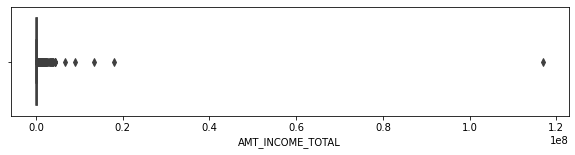

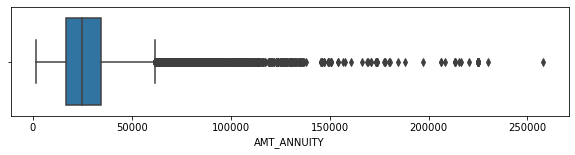

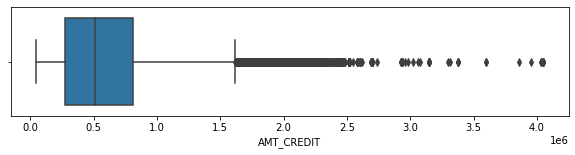

In [26]:
# Displaying outliers in the columns AMT_INCOME_TOTAL, AMT_ANNUITY & AMT_CREDIT of application_data set

plt.figure(figsize=(10,2))
sns.boxplot(app_data['AMT_INCOME_TOTAL'])
plt.show()

plt.figure(figsize=(10,2))
sns.boxplot(app_data['AMT_ANNUITY'])
plt.show()

plt.figure(figsize=(10,2))
sns.boxplot(app_data['AMT_CREDIT'])
plt.show()

In [27]:
# Excluding values outside 99 percentile for the columns AMT_INCOME_TOTAL, AMT_ANNUITY & AMT_CREDIT of application_data set

app_data = app_data[app_data['AMT_INCOME_TOTAL'] < np.nanpercentile(app_data['AMT_INCOME_TOTAL'], 99)]
app_data = app_data[app_data['AMT_ANNUITY'] < np.nanpercentile(app_data['AMT_ANNUITY'], 99)]
app_data = app_data[app_data['AMT_CREDIT'] < np.nanpercentile(app_data['AMT_CREDIT'], 99)]

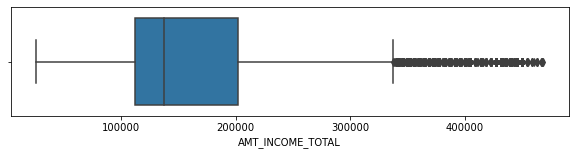

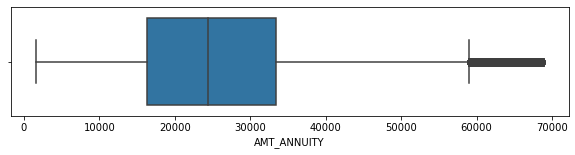

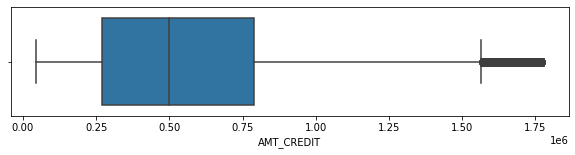

In [28]:
# Checking the columns AMT_INCOME_TOTAL, AMT_ANNUITY & AMT_CREDIT of application_data set after updating

plt.figure(figsize=(10,2))
sns.boxplot(app_data['AMT_INCOME_TOTAL'])
plt.show()

plt.figure(figsize=(10,2))
sns.boxplot(app_data['AMT_ANNUITY'])
plt.show()

plt.figure(figsize=(10,2))
sns.boxplot(app_data['AMT_CREDIT'])
plt.show()

In [29]:
# Describing the previous_applcation dataset to check for columns with possible outliers

prev.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,1.284699e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,2.278473e+05,1.248418e+01,9.964675e-01,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,3.153966e+05,3.334028e+00,5.932963e-02,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,5.084100e+04,1.000000e+01,1.000000e+00,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,1.200000e+01,1.000000e+00,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,2.340000e+05,1.500000e+01,1.000000e+00,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


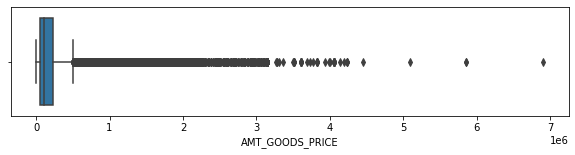

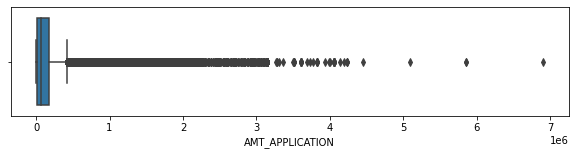

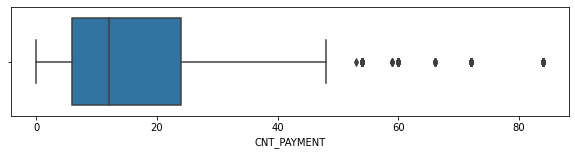

In [30]:
# Displaying outliers in the columns AMT_GOODS_PRICE, AMT_APPLICATION & CNT_PAYMENT of previous_application dataset

plt.figure(figsize=(10,2))
sns.boxplot(prev['AMT_GOODS_PRICE'])
plt.show()

plt.figure(figsize=(10,2))
sns.boxplot(prev['AMT_APPLICATION'])
plt.show()

plt.figure(figsize=(10,2))
sns.boxplot(prev['CNT_PAYMENT'])
plt.show()

In [31]:
# Excluding values outside 99 percentile for the columns AMT_GOODS_PRICE, AMT_APPLICATION & CNT_PAYMENT of previous_application dataset

prev = prev[prev['AMT_GOODS_PRICE'] < np.nanpercentile(prev['AMT_GOODS_PRICE'], 99)]
prev = prev[prev['AMT_APPLICATION'] < np.nanpercentile(prev['AMT_APPLICATION'], 99)]
prev = prev[prev['CNT_PAYMENT'] < np.nanpercentile(prev['CNT_PAYMENT'], 99)]

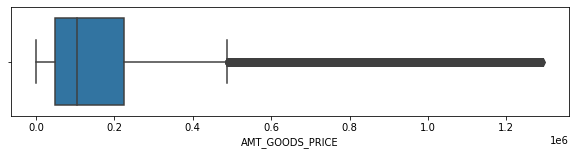

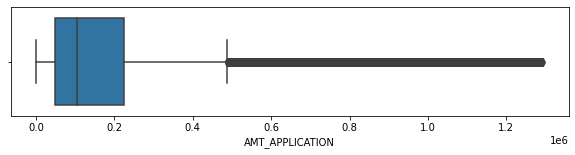

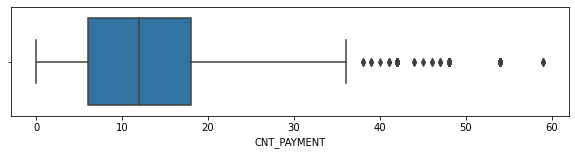

In [32]:
# Checking the columns AMT_GOODS_PRICE, AMT_APPLICATION & CNT_PAYMENT of previous_application dataset after updating

plt.figure(figsize=(10,2))
sns.boxplot(prev['AMT_GOODS_PRICE'])
plt.show()

plt.figure(figsize=(10,2))
sns.boxplot(prev['AMT_APPLICATION'])
plt.show()

plt.figure(figsize=(10,2))
sns.boxplot(prev['CNT_PAYMENT'])
plt.show()

## Analysing Application Data

In [33]:
# Splitting Data with respect to TARGET = 0 and TARGET = 1

defaulters  = app_data[app_data["TARGET"] == 1]
non_defaulters  = app_data[app_data["TARGET"] == 0]

In [34]:
# Finding out the percentage value of all the Defaulters using the function "defaulter_percentage".

def defaulters_percentage(ds, columns):
    temp = pd.DataFrame(columns = ['Value', 'Percentage of Defaulter'])
    
    for values in ds[columns].unique():
        default = ds[(ds[columns] == values) & (ds.TARGET == 1)].shape[0]
        total = ds[ds[columns] == values].shape[0]
        temp = temp.append({'Value' : values , 'Percentage of Defaulter' : (default * 100 / total)}, ignore_index=True)
    return temp.sort_values(by='Percentage of Defaulter', ascending=False)

### Data Imbalance Ratio

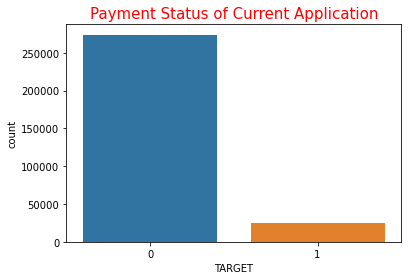

In [35]:
# Checking Payment status of the current application_data set

plt.title("Payment Status of Current Application", fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Red'})
sns.countplot(app_data['TARGET'])
plt.show()

In [36]:
# Number and percentage of defaulters Vs non-defaulters

print("Number of defaulters : ", defaulters.shape[0])
print("Number of non-defaulters: ", non_defaulters.shape[0])
print("Percentage of defaulters : ", round(defaulters.shape[0] * 100 / (defaulters.shape[0] + non_defaulters.shape[0])))
print("Percentage of non-defaulters : ", round(non_defaulters.shape[0] * 100 / (defaulters.shape[0] + non_defaulters.shape[0])))

Number of defaulters :  24413
Number of non-defaulters:  273926
Percentage of defaulters :  8
Percentage of non-defaulters :  92


#### Analysis

The number of defaulters is very low in the given population and the defaulter ratio is 8:92 = 2:23

### Housing Information of Applicant (Univariate Categorical)

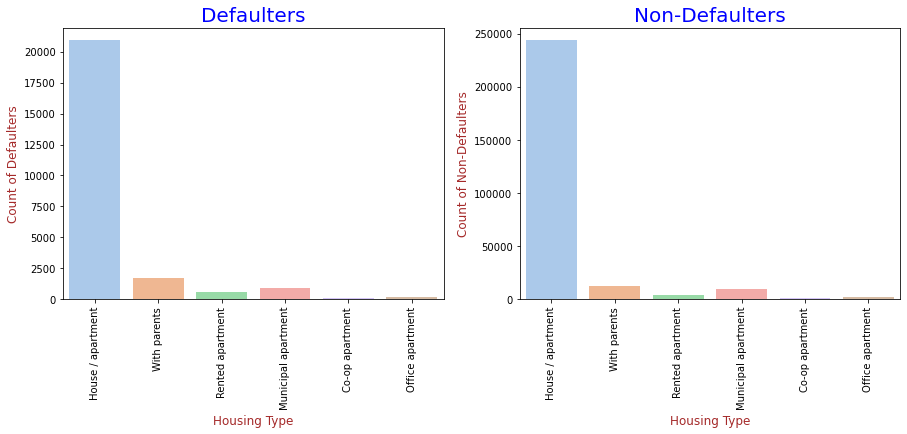

In [37]:
# Ploting the Housing Type (NAME_HOUSING_TYPE) for defaulters and non-defaulters

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x = defaulters["NAME_HOUSING_TYPE"], order = ["House / apartment","With parents","Rented apartment","Municipal apartment","Co-op apartment","Office apartment"], palette = 'pastel')
plt.xticks(rotation = 90)
plt.title("Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Blue'})
plt.xlabel("Housing Type", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Count of Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

plt.subplot(1,2,2)
sns.countplot(x = non_defaulters["NAME_HOUSING_TYPE"], order = ["House / apartment","With parents","Rented apartment","Municipal apartment","Co-op apartment","Office apartment"], palette = 'pastel')
plt.xticks(rotation = 90)
plt.title("Non-Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Blue'})
plt.xlabel("Housing Type", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Count of Non-Defaulters", fontdict =  {'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.show()

In [38]:
# Finding out the percentage value of all the Defaulters

defaulters_percentage(app_data, "NAME_HOUSING_TYPE")

,Value,Percentage of Defaulter
1,Rented apartment,12.447611
2,With parents,11.759863
3,Municipal apartment,8.649094
5,Co-op apartment,8.014572
0,House / apartment,7.904230
4,Office apartment,6.714628


#### Analysis

1. Large number of people stay in House / apartment and very few stay in Co-op apartment
2. People staying in Rented apartment and with parents have the highest chance of being defaulters whereas people staying in Office apartment have the least chance of defaulting

### Social Circle Info (Univariate Categorical)

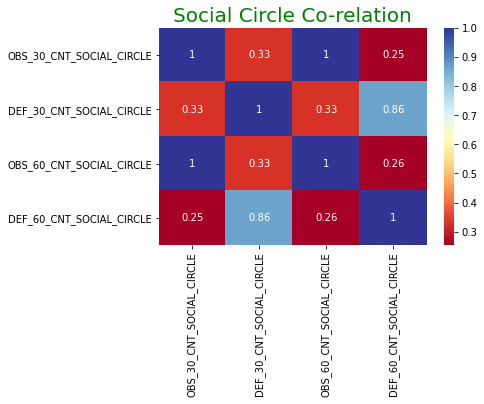

In [39]:
# Co-relation of Social Circle columns

Social_circle = app_data.loc[:, "OBS_30_CNT_SOCIAL_CIRCLE":"DEF_60_CNT_SOCIAL_CIRCLE"]
sns.heatmap(Social_circle.corr(), annot = True, cmap = "RdYlBu")
plt.title("Social Circle Co-relation", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.show()

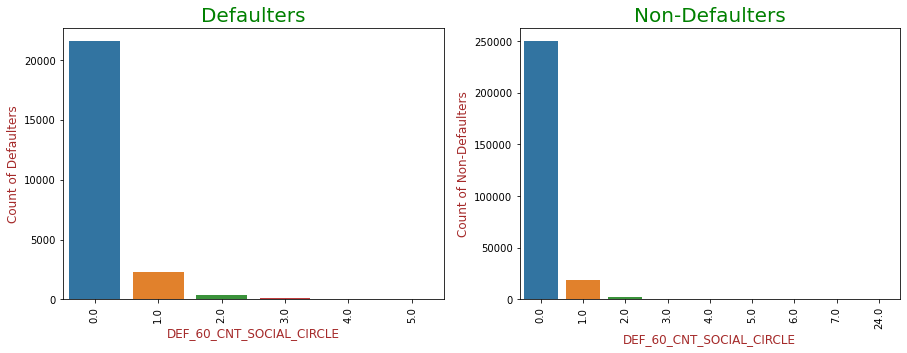

In [40]:
# Comparison of DEF_60_CNT_SOCIAL_CIRCLE for Defaulters and Non-Defaulters using Count Plot

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x = defaulters["DEF_60_CNT_SOCIAL_CIRCLE"])
plt.xticks(rotation = 90)
plt.title("Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("DEF_60_CNT_SOCIAL_CIRCLE", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Count of Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

plt.subplot(1,2,2)
sns.countplot(x = non_defaulters["DEF_60_CNT_SOCIAL_CIRCLE"])
plt.xticks(rotation = 90)
plt.title("Non-Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("DEF_60_CNT_SOCIAL_CIRCLE", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Count of Non-Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.show()

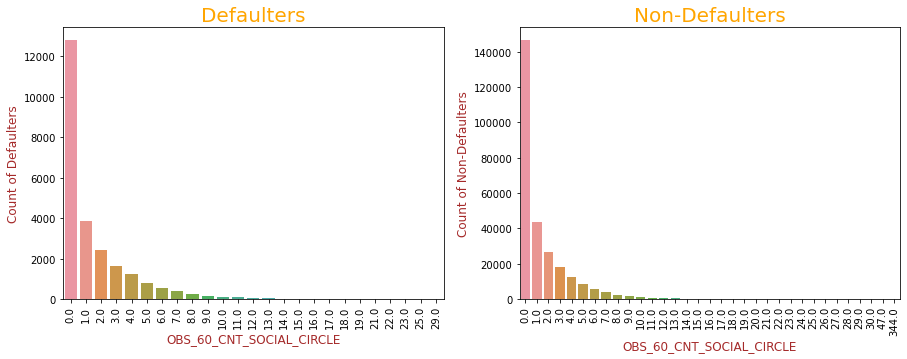

In [41]:
# Comparison of OBS_60_CNT_SOCIAL_CIRCLE for Defaulters and Non-Defaulters using Count Plot


plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x = defaulters["OBS_60_CNT_SOCIAL_CIRCLE"])
plt.xticks(rotation = 90)
plt.title("Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Orange'})
plt.xlabel("OBS_60_CNT_SOCIAL_CIRCLE", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Count of Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

plt.subplot(1,2,2)
sns.countplot(x = non_defaulters["OBS_60_CNT_SOCIAL_CIRCLE"])
plt.xticks(rotation = 90)
plt.title("Non-Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Orange'})
plt.xlabel("OBS_60_CNT_SOCIAL_CIRCLE", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Count of Non-Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.show()

#### Analysis
1. DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE are highly correlated
2. For both defaulters as well as non-defaulters 'DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE' columns show a similar trend

### Documents Submitted by Applicant (Univariate Categorical)

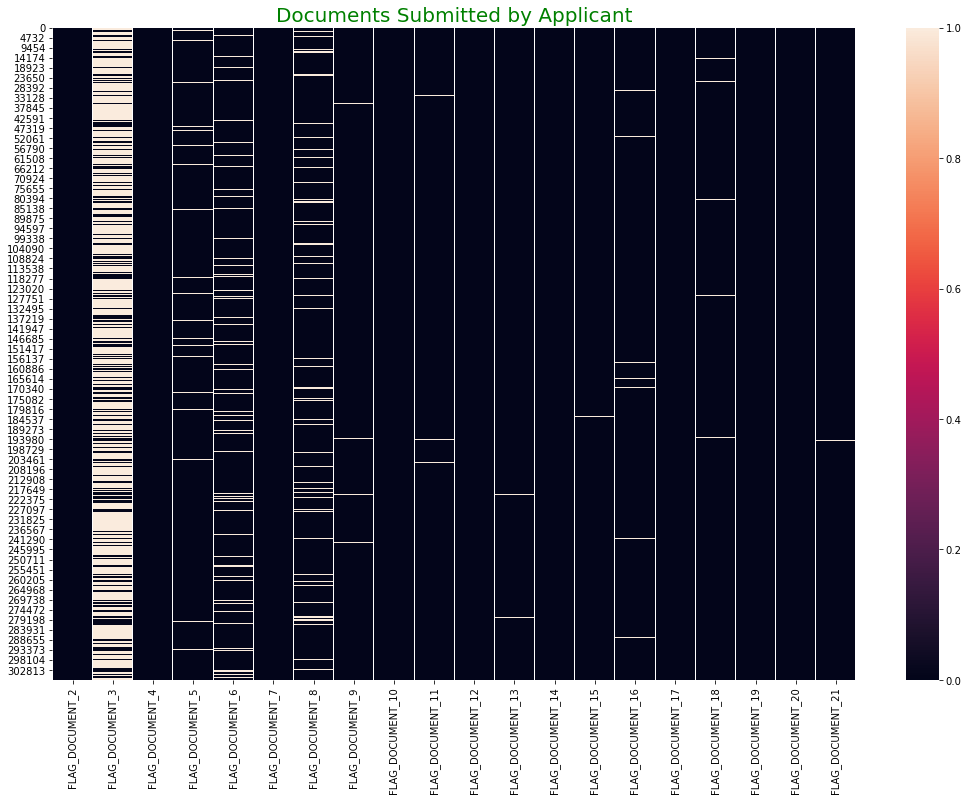

In [42]:
# Co-relation of FLAG_DOCUMENT columns

plt.figure(figsize=(18,12))
sns.heatmap(app_data.loc[:, "FLAG_DOCUMENT_2":"FLAG_DOCUMENT_21"])
plt.title("Documents Submitted by Applicant", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.show()

###### Analysis - Only document 3 were submitted by applicants in majority of the cases

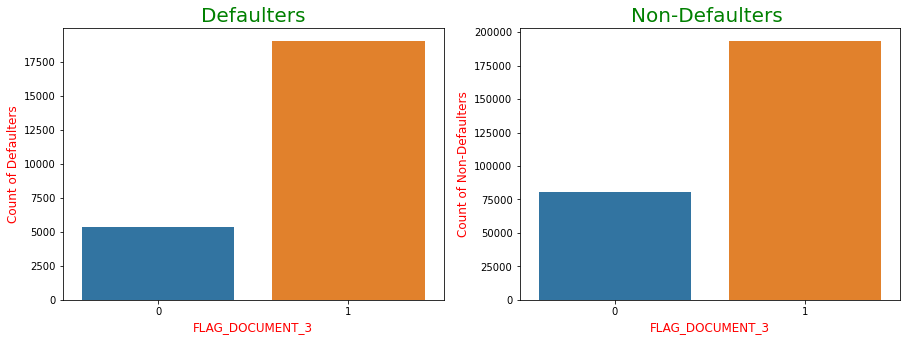

In [43]:
# Analysing both defaulters and non-defaulters entries to identify submissions of Document 3 (FLAG_DOCUMENT_3)

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x = defaulters["FLAG_DOCUMENT_3"], order = [0, 1])
plt.title("Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("FLAG_DOCUMENT_3", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Count of Defaulters", fontdict ={'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})

plt.subplot(1,2,2)
sns.countplot(x = non_defaulters["FLAG_DOCUMENT_3"], order=[0, 1])
plt.title("Non-Defaulters ", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("FLAG_DOCUMENT_3", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Count of Non-Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.show()

#### Analysis

1. Percentage of Defaulters who have not submitted the document 3 is almost same as that of Non-Defaulters
2. Number of Non-Defaulters those who have provided the document 3 is more than that of Defaulters

### Asset Details (Univariate Categorical and Continuous)

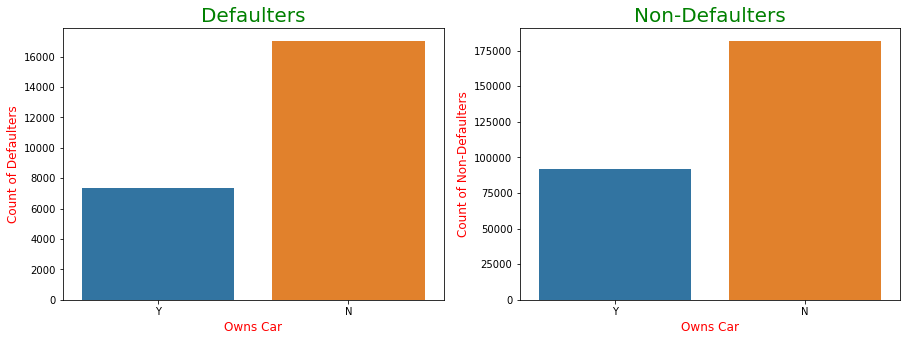

In [44]:
# Analysing for both defaulters and non-defaulters if they own a car or not (FLAG_OWN_CAR)

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x = defaulters["FLAG_OWN_CAR"], order = ["Y", "N"])
plt.title("Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("Owns Car", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Count of Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})

plt.subplot(1,2,2)
sns.countplot(x = non_defaulters["FLAG_OWN_CAR"], order =  ["Y", "N"])
plt.title("Non-Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("Owns Car", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Count of Non-Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.show()

In [45]:
# Finding out the percentage value of all the Defaulters

defaulters_percentage(app_data, 'FLAG_OWN_CAR')

,Value,Percentage of Defaulter
0,N,8.568655
1,Y,7.412617


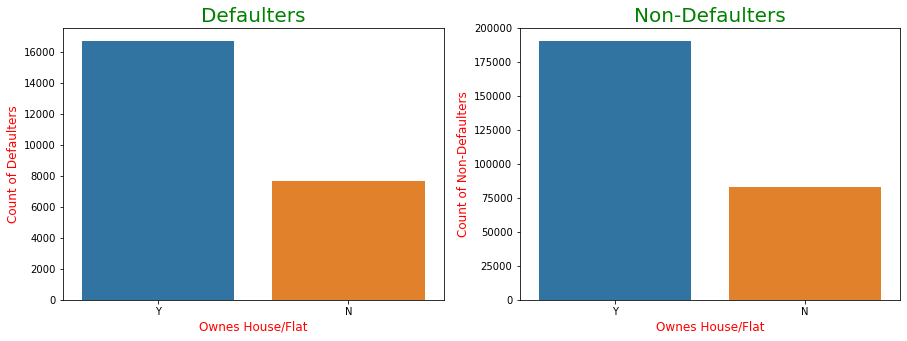

In [46]:
# Analysing for both defaulters and non-defaulters if they own a House/Flat or not (FLAG_OWN_REALTY)

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x = defaulters["FLAG_OWN_REALTY"], order = ["Y", "N"])
plt.title("Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("Ownes House/Flat", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Count of Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})

plt.subplot(1,2,2)
sns.countplot(x = non_defaulters["FLAG_OWN_REALTY"], order = ["Y", "N"])
plt.title("Non-Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("Ownes House/Flat", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Count of Non-Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.show()

In [47]:
# Finding out the percentage value of all the Defaulters

defaulters_percentage(app_data, "FLAG_OWN_REALTY")

,Value,Percentage of Defaulter
1,N,8.448972
0,Y,8.066065


#### Analysis

1. More number of Non-Defaulters own cars compared to defaulters
2. Similarly, more number of Non-Defaulters own Houses/Flat compared to defaulters
3. More number of people own House/flat compared to cars irrespective of being defaulters or non-defaulters

### Family Related Info (Univariate Categorical)

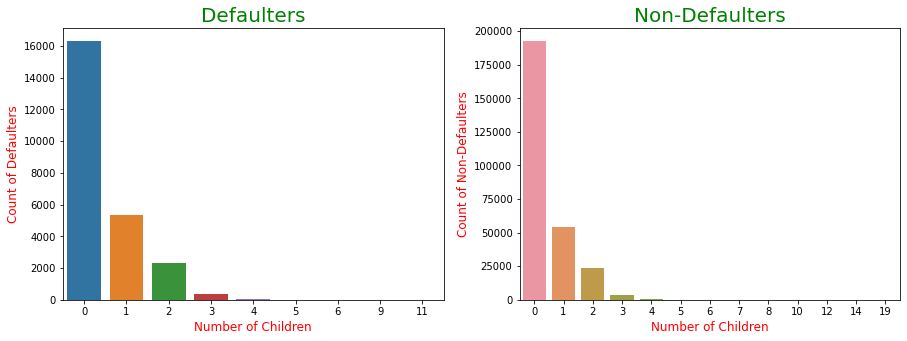

In [48]:
# Analysing the number of children (CNT_CHILDREN) each defaulter and non-defaulter have

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x = defaulters["CNT_CHILDREN"])
plt.title("Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("Number of Children", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Count of Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})

plt.subplot(1,2,2)
sns.countplot(x = non_defaulters["CNT_CHILDREN"])
plt.title("Non-Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("Number of Children", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Count of Non-Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.show()

In [49]:
# Finding out the percentage value of all the Defaulters

defaulters_percentage(app_data, "CNT_CHILDREN")

,Value,Percentage of Defaulter
9,9.0,100.000000
10,11.0,100.000000
7,6.0,28.571429
4,4.0,13.235294
3,3.0,9.777159
1,1.0,9.070207
2,2.0,8.876952
0,0.0,7.805968
6,5.0,7.228916
5,7.0,0.000000


In [50]:
# Imputing missing value for CNT_FAM_MEMBERS (Count of Family Members) as "Unknown"

app_data['CNT_FAM_MEMBERS'].fillna("Unknown", inplace=True)

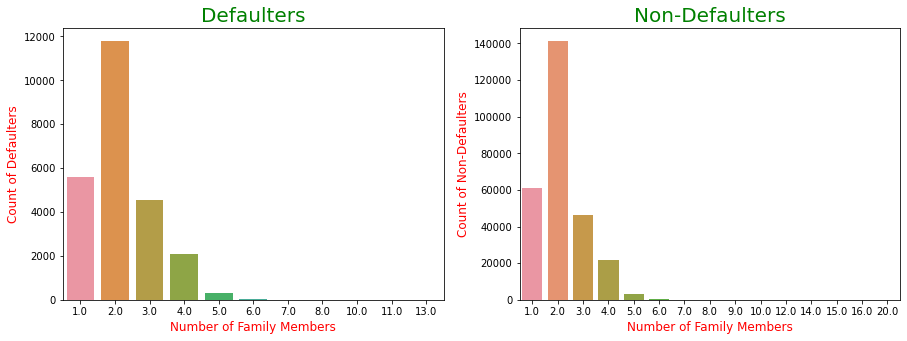

In [51]:
# Analysing the number of Family Members (CNT_FAM_MEMBERS) each defaulter and non-defaulter have

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x = defaulters["CNT_FAM_MEMBERS"])
plt.title("Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("Number of Family Members", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Count of Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})

plt.subplot(1,2,2)
sns.countplot(x = non_defaulters["CNT_FAM_MEMBERS"])
plt.title("Non-Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("Number of Family Members", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Count of Non-Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.show()

In [52]:
# Finding out the percentage value of all the Defaulters for Count of Family Members

defaulters_percentage(app_data, "CNT_FAM_MEMBERS")

,Value,Percentage of Defaulter
17,11,100.000000
10,13,100.000000
9,10,33.333333
8,8,30.000000
5,6,13.917526
4,5,9.535161
2,3,8.900709
3,4,8.808616
0,1,8.409275
1,2,7.701700


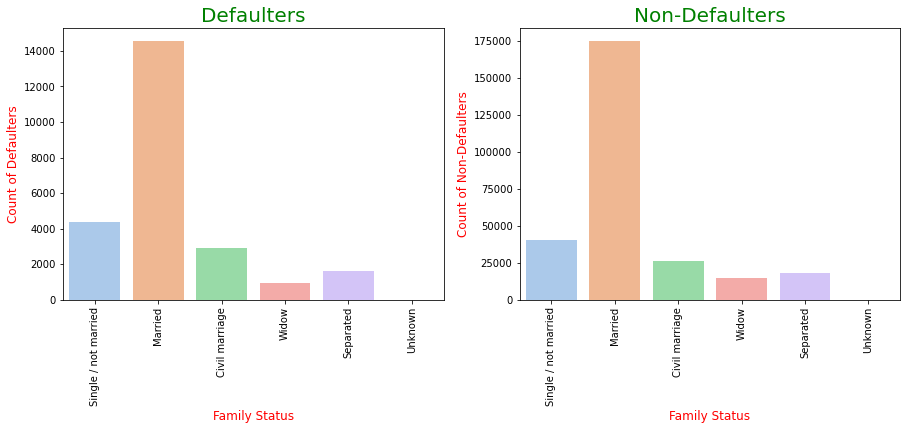

In [53]:
# Analysing the family status (NAME_FAMILY_STATUS) for each defaulter and non-defaulter

ord_fam = app_data["NAME_FAMILY_STATUS"].unique()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x = defaulters["NAME_FAMILY_STATUS"], order = ord_fam, palette = 'pastel')
plt.xticks(rotation = 90)
plt.title("Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("Family Status", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Count of Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})

plt.subplot(1,2,2)
sns.countplot(x = non_defaulters["NAME_FAMILY_STATUS"], order = ord_fam, palette = 'pastel')
plt.xticks(rotation = 90)
plt.title("Non-Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("Family Status", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Count of Non-Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.show()

In [54]:
# Finding out the percentage value of all the Defaulters

defaulters_percentage(app_data, "NAME_FAMILY_STATUS")

,Value,Percentage of Defaulter
2,Civil marriage,10.023350
0,Single / not married,9.894287
4,Separated,8.262108
1,Married,7.687316
3,Widow,5.841298
5,Unknown,0.000000


#### Analysis

1. People with more number of children have higher defaulting percentage
2. People with more number of family members have higher defaulting percentage
3. Majority People in the dataset are married and have no children with 2 family members
4. Civil Marriage and Single/not married people have the highest defaulters rate 

### Education and Occupation Info (Univariate Categorical)

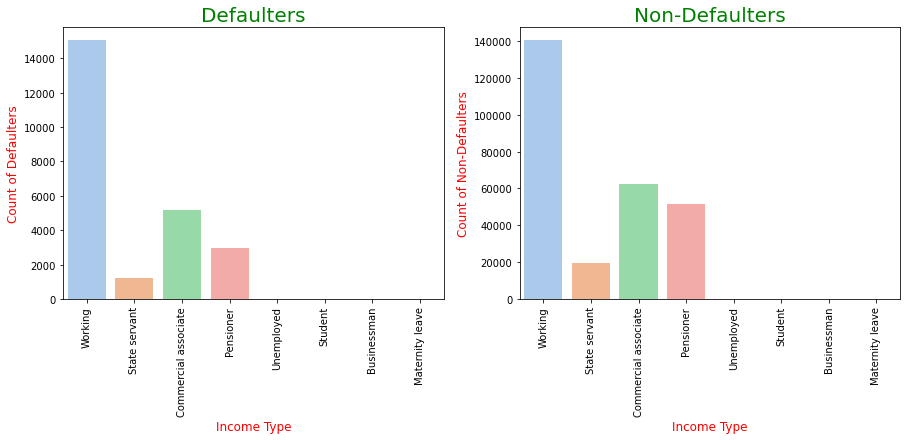

In [55]:
# Analysing income type (NAME_INCOME_TYPE) for both defaulters and non-defaulters

ord_Inc = app_data["NAME_INCOME_TYPE"].unique()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x = defaulters["NAME_INCOME_TYPE"], order = ord_Inc, palette = 'pastel')
plt.xticks(rotation = 90)
plt.title("Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("Income Type", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Count of Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})

plt.subplot(1,2,2)
sns.countplot(x = non_defaulters["NAME_INCOME_TYPE"], order = ord_Inc, palette = 'pastel')
plt.xticks(rotation = 90)
plt.title("Non-Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("Income Type", fontdict =  {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Count of Non-Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.show()

In [56]:
# Finding out the percentage value of all the Defaulters

defaulters_percentage(app_data, "NAME_INCOME_TYPE")

,Value,Percentage of Defaulter
7,Maternity leave,50.000000
4,Unemployed,38.095238
0,Working,9.678602
2,Commercial associate,7.664325
1,State servant,5.871604
3,Pensioner,5.427453
5,Student,0.000000
6,Businessman,0.000000


In [57]:
# Count of peolpe based on there income type

app_data["NAME_INCOME_TYPE"].value_counts()

Working                 155446
Commercial associate     67625
Pensioner                54427
State servant            20795
Unemployed                  21
Student                     17
Businessman                  4
Maternity leave              4
Name: NAME_INCOME_TYPE, dtype: int64

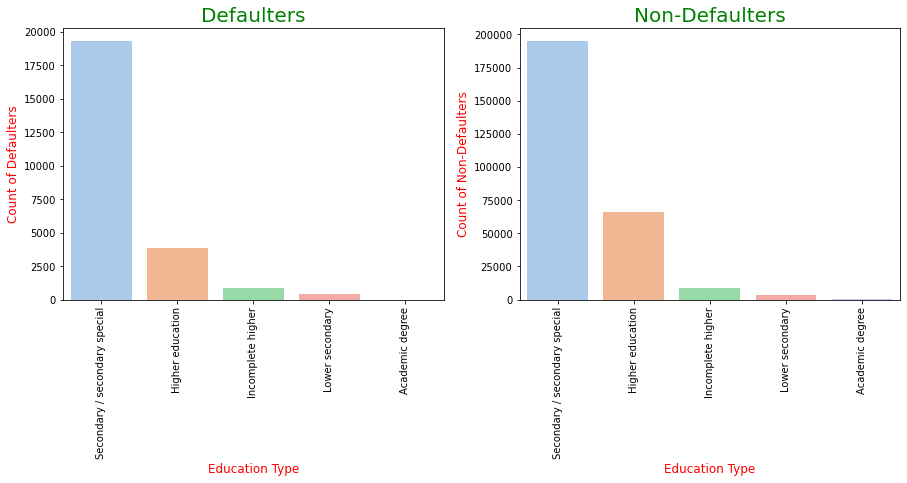

In [58]:
# Analysing education type (NAME_EDUCATION_TYPE) for both defaulters and non-defaulters

ord_edu = app_data["NAME_EDUCATION_TYPE"].unique()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x = defaulters["NAME_EDUCATION_TYPE"], order = ord_edu, palette = 'pastel')
plt.xticks(rotation = 90)
plt.title("Defaulters", fontdict =  {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("Education Type", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Count of Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})

plt.subplot(1,2,2)
sns.countplot(x = non_defaulters["NAME_EDUCATION_TYPE"], order = ord_edu, palette = 'pastel')
plt.xticks(rotation = 90)
plt.title("Non-Defaulters", fontdict =  {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("Education Type", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Count of Non-Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.show()

In [59]:
# Finding out the percentage value of all the Defaulters

defaulters_percentage(app_data, "NAME_EDUCATION_TYPE")

,Value,Percentage of Defaulter
3,Lower secondary,11.022998
0,Secondary / secondary special,9.000564
2,Incomplete higher,8.565677
1,Higher education,5.475137
4,Academic degree,2.040816


In [60]:
# Imputing missing value for OCCUPATION TYPE as "Unknown"

app_data['OCCUPATION_TYPE'].fillna("Unknown", inplace=True)

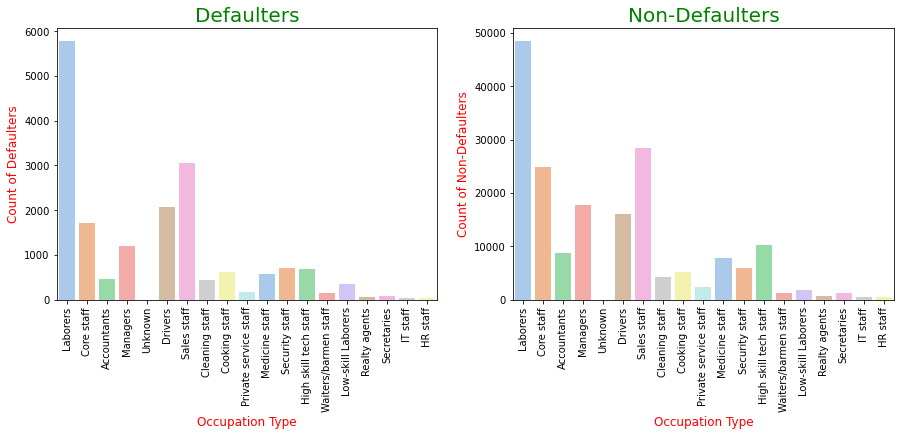

In [61]:
# Analysing Occupation Type (OCCUPATION_TYPE) for both defaulter and non-defaulter

order_occup = app_data["OCCUPATION_TYPE"].unique()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x = defaulters["OCCUPATION_TYPE"], order = order_occup, palette = 'pastel')
plt.xticks(rotation = 90)
plt.title("Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("Occupation Type", fontdict =  {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Count of Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})

plt.subplot(1,2,2)
sns.countplot(x = non_defaulters["OCCUPATION_TYPE"], order = order_occup, palette = 'pastel')
plt.xticks(rotation = 90)
plt.title("Non-Defaulters", fontdict =  {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("Occupation Type", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Count of Non-Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.show()

In [62]:
# Finding out the percentage value of all the Defaulters

defaulters_percentage(app_data, "OCCUPATION_TYPE")

,Value,Percentage of Defaulter
14,Low-skill Laborers,17.178503
5,Drivers,11.429201
13,Waiters/barmen staff,11.343284
11,Security staff,10.794941
0,Laborers,10.652794
8,Cooking staff,10.493304
6,Sales staff,9.691042
7,Cleaning staff,9.587562
15,Realty agents,8.104396
16,Secretaries,7.159717


#### Analysis

1. Most of the people part of this data set are working professionals
2. People on Maternity Leave and Unemployed people have the highest defaulting percentage whereas Students & Businessmen have the least defaulting percentage
4. People with Lower secondary as their education have the highest defaulting percentage whereas people with Academic degree have the least defaulting percentage
5. Low-skill Laborers have highest defaulting percentage whereas Accountants have the least defaulting percentage

## Gender (Univariate Categorical)

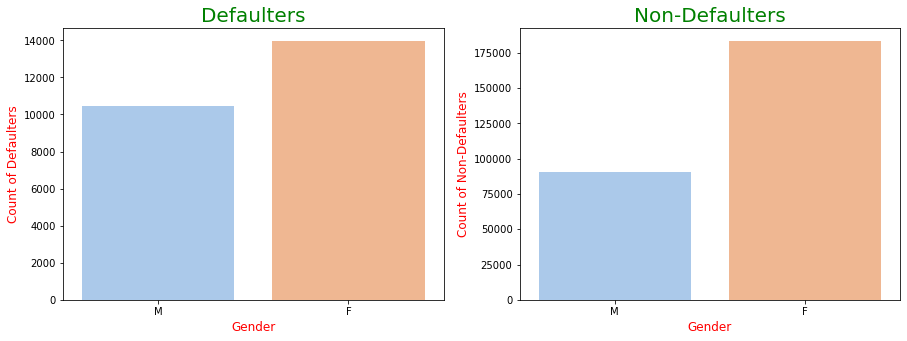

In [63]:
# Analysing the gender (CODE_GENDER) for both defaulter and non-defaulter

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x = defaulters["CODE_GENDER"], order = ["M", "F"] , palette =  'pastel')
plt.title("Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("Gender", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Count of Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})

plt.subplot(1,2,2)
sns.countplot(x = non_defaulters["CODE_GENDER"], order = ["M", "F"], palette = 'pastel')
plt.title("Non-Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("Gender", fontdict =  {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Count of Non-Defaulters", fontdict =  {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.show()

In [64]:
# Finding out the percentage value of all the Defaulters

defaulters_percentage(app_data, "CODE_GENDER")

,Value,Percentage of Defaulter
0,M,10.344008
1,F,7.077310
2,XNA,0.000000


In [65]:
# The number of Males and Females

app_data["CODE_GENDER"].value_counts()

F      197349
M      100986
XNA         4
Name: CODE_GENDER, dtype: int64

#### Analysis

1. Regardless of defaulters or non-defaulters, there are more number of females in the dataset than males
2. Males have a higher defaulting percentage

## Age (Univariate Continuous)

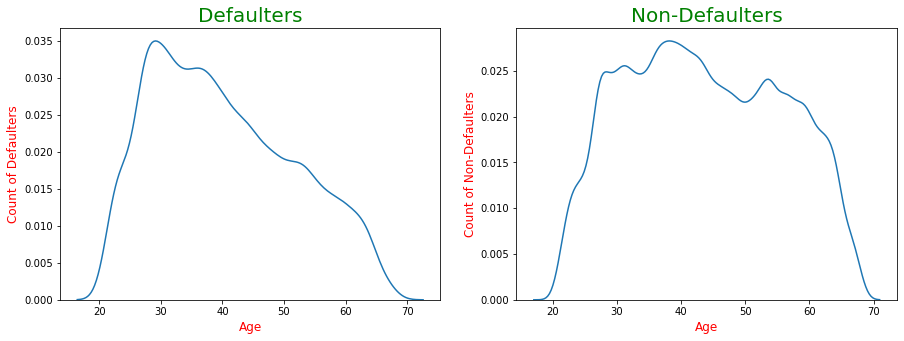

In [66]:
# Analysing age (DAYS_BIRTH) for both defaulters and non-defaulters

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(x = defaulters["DAYS_BIRTH"] // 365.25, hist =  False)
plt.title("Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("Age", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Count of Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})

plt.subplot(1,2,2)
sns.distplot(x = non_defaulters["DAYS_BIRTH"] // 365.25, hist =  False)
plt.title("Non-Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("Age", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Count of Non-Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.show()

#### Analysis

1. People around the age of 30 years have highest defaulting rate
2. Defaulting rate reduces as the age crosses 30 years

## Credit amount and goods price (Bivariate Continuous - Continuous)

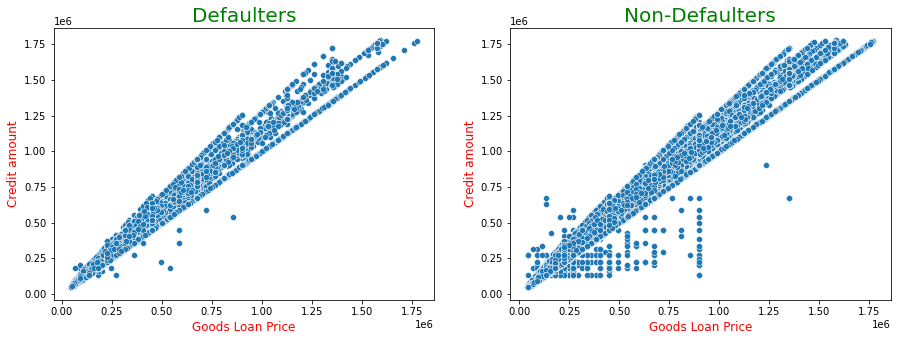

In [67]:
# Checking the  Credit amount of the loan (AMT_CREDIT) and the price of the goods for which the loan is given to the consumer(AMT_GOODS_PRICE) for both defaulter and non-defaulter

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.scatterplot(x = defaulters["AMT_GOODS_PRICE"], y = defaulters["AMT_CREDIT"])
plt.title("Defaulters", fontdict ={'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("Goods Loan Price", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Credit amount", fontdict =  {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})

plt.subplot(1,2,2)
sns.scatterplot(x = non_defaulters["AMT_GOODS_PRICE"], y = non_defaulters["AMT_CREDIT"])
plt.title("Non-Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("Goods Loan Price", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Credit amount", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.show()

#### Analysis

1. Credit amount of the loan and Goods Loan Price follow a linear relation where the credit amount of the loan increases with increase in the price of the goods for which the loan is given
2. The number of defaulters is less than that of non-defaulters for lower range of credit amount and goods price

## Normalized score from external data source (Univariate Continous) 

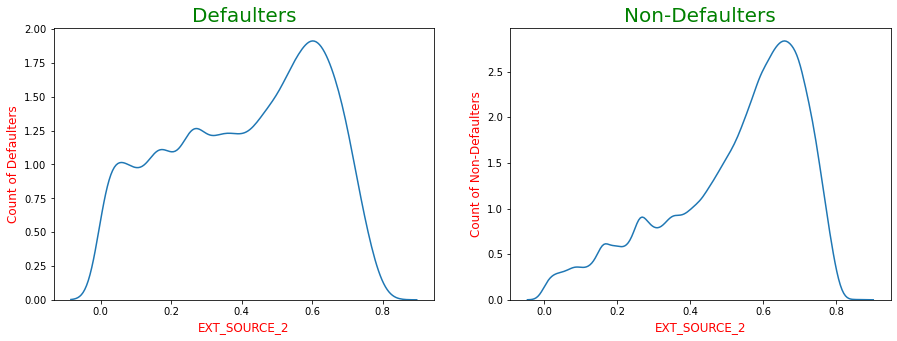

In [68]:
# Analysing the column 'EXT_SOURCE_2' for both defaulters and non-defaulters

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(x = defaulters["EXT_SOURCE_2"], hist = False)
plt.title("Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("EXT_SOURCE_2", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Count of Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})

plt.subplot(1,2,2)
sns.distplot(x = non_defaulters["EXT_SOURCE_2"], hist = False)
plt.title("Non-Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("EXT_SOURCE_2", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Count of Non-Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.show()

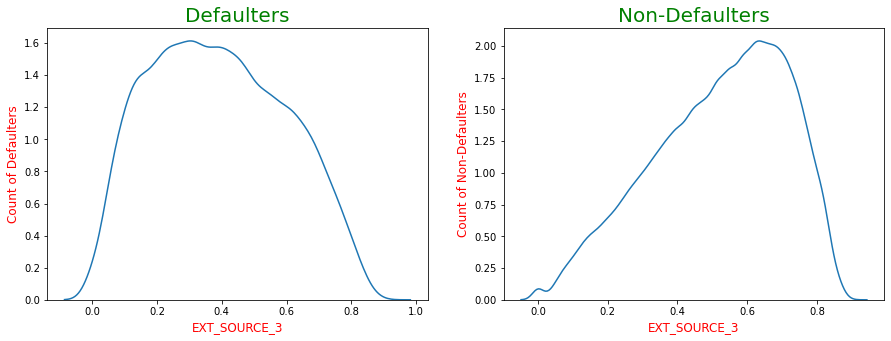

In [69]:
# Analysing the column 'EXT_SOURCE_3' for both defaulters and non-defaulters

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(x = defaulters["EXT_SOURCE_3"], hist = False)
plt.title("Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("EXT_SOURCE_3", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Count of Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})

plt.subplot(1,2,2)
sns.distplot(x = non_defaulters["EXT_SOURCE_3"], hist = False)
plt.title("Non-Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("EXT_SOURCE_3", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Count of Non-Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.show()

#### Analysis 

Normalized score - EXT_SOURCE_3 has a very different distribution for defaulters and non-defaulters whereas EXT_SOURCE_2 is almost similar for both defaulters & non-defaulters

## Address (Univariate Categorical)

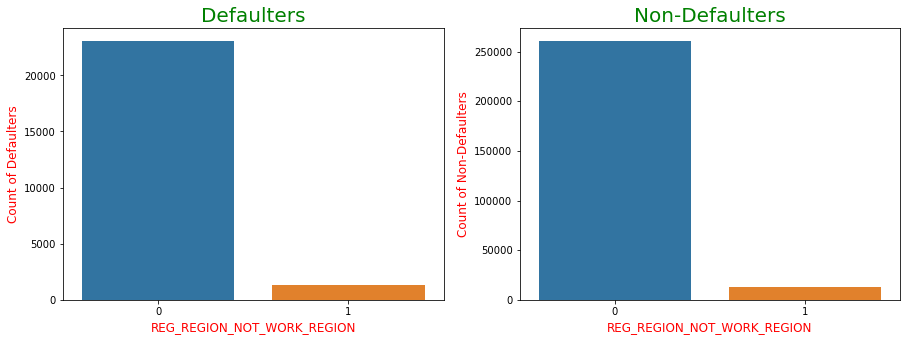

In [70]:
# Analysing the details for REG_REGION_NOT_WORK_REGION (if client's permanent address does not match work address) for both defaulters and non-defaulters

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x = defaulters["REG_REGION_NOT_WORK_REGION"])
plt.title("Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("REG_REGION_NOT_WORK_REGION", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Count of Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})

plt.subplot(1,2,2)
sns.countplot(x = non_defaulters["REG_REGION_NOT_WORK_REGION"])
plt.title("Non-Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("REG_REGION_NOT_WORK_REGION", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Count of Non-Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.show()

In [71]:
# Finding out the percentage value of all the Defaulters

defaulters_percentage(app_data, "REG_REGION_NOT_WORK_REGION")

,Value,Percentage of Defaulter
1,1.0,9.258495
0,0.0,8.127878


#### Analysis

Defaulter rate is highest when the permanent address is same as the working address which is plotted by REG_REGION_NOT_WORK_REGION = 0 

## Analysing Previous Application

In [72]:
# Merging required columns from application_data set with previous_application dataset into a data frame - merged_data

merged_data = pd.merge(app_data[['SK_ID_CURR', 'TARGET', 'AMT_INCOME_TOTAL']], prev, how = 'left', on = ['SK_ID_CURR'])

In [73]:
# Analysing the merged_data set's columnn information

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998075 entries, 0 to 998074
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   998075 non-null  int64  
 1   TARGET                       998075 non-null  int64  
 2   AMT_INCOME_TOTAL             998075 non-null  float64
 3   SK_ID_PREV                   981432 non-null  float64
 4   NAME_CONTRACT_TYPE           981432 non-null  object 
 5   AMT_ANNUITY                  981428 non-null  float64
 6   AMT_APPLICATION              981432 non-null  float64
 7   AMT_CREDIT                   981432 non-null  float64
 8   AMT_GOODS_PRICE              981432 non-null  float64
 9   WEEKDAY_APPR_PROCESS_START   981432 non-null  object 
 10  HOUR_APPR_PROCESS_START      981432 non-null  float64
 11  FLAG_LAST_APPL_PER_CONTRACT  981432 non-null  object 
 12  NFLAG_LAST_APPL_IN_DAY       981432 non-null  float64
 13 

In [74]:
# Describing the merged_data

merged_data.describe()

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,998075.000000,998075.000000,998075.000000,9.814320e+05,981428.000000,9.814320e+05,9.814320e+05,9.814320e+05,981432.000000,981432.000000,981432.000000,9.814320e+05,981432.000000,779007.000000,779007.000000,779007.000000,779007.000000,779007.000000,779007.000000
mean,278467.075467,0.083426,164166.496540,1.912121e+06,14466.826445,1.811660e+05,1.929805e+05,1.812008e+05,12.571362,0.997847,-1049.773280,4.220592e+02,14.602649,353721.698854,10507.086618,18720.690107,68917.815941,70352.574219,0.340391
std,102760.947004,0.276525,75242.552044,5.344738e+05,12802.860742,2.146491e+05,2.342571e+05,2.146905e+05,3.316677,0.046350,790.870018,9.220353e+03,11.251310,63872.182477,64161.587401,82058.212193,143940.755560,145048.267071,0.473841
min,100002.000000,0.000000,25650.000000,1.000001e+06,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,-2922.000000,-1.000000e+00,0.000000,-2785.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,189373.000000,0.000000,112500.000000,1.444642e+06,5991.390000,4.806000e+04,4.797000e+04,4.806000e+04,10.000000,1.000000,-1584.000000,-1.000000e+00,6.000000,365243.000000,-1623.000000,-1320.000000,-1355.000000,-1338.000000,0.000000
50%,278979.000000,0.000000,157500.000000,1.907158e+06,10585.440000,1.030050e+05,1.050075e+05,1.030140e+05,12.000000,1.000000,-799.000000,3.000000e+01,12.000000,365243.000000,-833.000000,-433.000000,-569.000000,-557.000000,0.000000
75%,367312.500000,0.000000,202500.000000,2.375252e+06,18276.975000,2.250000e+05,2.250000e+05,2.250000e+05,15.000000,1.000000,-403.000000,1.500000e+02,18.000000,365243.000000,-414.000000,44.000000,-109.000000,-100.000000,1.000000
max,456255.000000,1.000000,468823.500000,2.845379e+06,309942.000000,1.291500e+06,1.622349e+06,1.291500e+06,23.000000,1.000000,-1.000000,4.000000e+06,59.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [75]:
# Splitting Data with respect to TARGET=0 and TARGET=1

merged_data_defaulters  = merged_data[merged_data["TARGET"] == 1]
merged_data_non_defaulters  = merged_data[merged_data["TARGET"] == 0]

### Checking Data Imbalance in Previous Application Data¶


### Data Imbalance Ratio


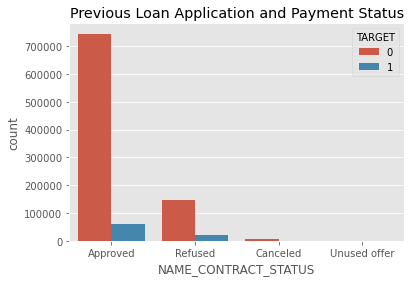

In [76]:
# Analysing the Previous Loan Application and Payment Status

plt.style.use("ggplot")
plt.title("Previous Loan Application and Payment Status")
sns.countplot(merged_data['NAME_CONTRACT_STATUS'], hue = merged_data['TARGET'])
plt.show()

In [77]:
# Percentage of previously approved loan applicants that defaulted in current loan

approved_loans = merged_data[merged_data['NAME_CONTRACT_STATUS'] == "Approved"].shape[0]
defaulted_loans = merged_data[(merged_data['TARGET'] == 1) & (merged_data['NAME_CONTRACT_STATUS'] == "Approved")].shape[0]

print("Previously approved loan applicants that defaulted in current loan : ", round((defaulted_loans * 100) / approved_loans),"%")

Previously approved loan applicants that defaulted in current loan :  8 %


In [78]:
# Percentage of previously refused loan applicants that were able to pay current loan

refused_loans = merged_data[merged_data['NAME_CONTRACT_STATUS'] == "Refused"].shape[0]
non_defaulted_loans = merged_data[(merged_data['TARGET'] == 0) & (merged_data['NAME_CONTRACT_STATUS'] == "Refused")].shape[0]

print("Previously refused loan applicants that were able to pay current loan : ", round((non_defaulted_loans * 100) / refused_loans),"%")

Previously refused loan applicants that were able to pay current loan :  88 %


#### Analysis 

1. 8% of the previously approved loan applicants defaulted in current loan
2. 88% of the previously refused loan applicants were able to pay current loan
3. The percentage of applicants whose current loan defaulted but their previous loans were approved is very less which means that these applicants are more likely to pay their current loan in time than the applicants whose previous loans were refused

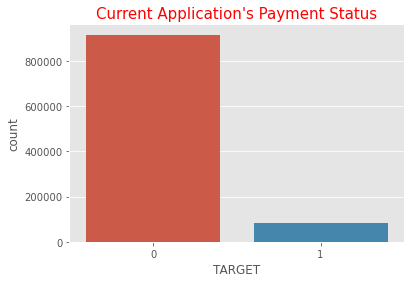

In [79]:
# Analysing the current application's Payment status

plt.title("Current Application's Payment Status", fontdict = {'fontsize': 15, 'fontweight' : 15, 'color' : 'Red'})
sns.countplot(merged_data['TARGET'])
plt.show()

#### The result  is highly imbalanced as there are very less defaulters in the total population

## Income Vs Credit amount (Bivariate Continous - Continous)

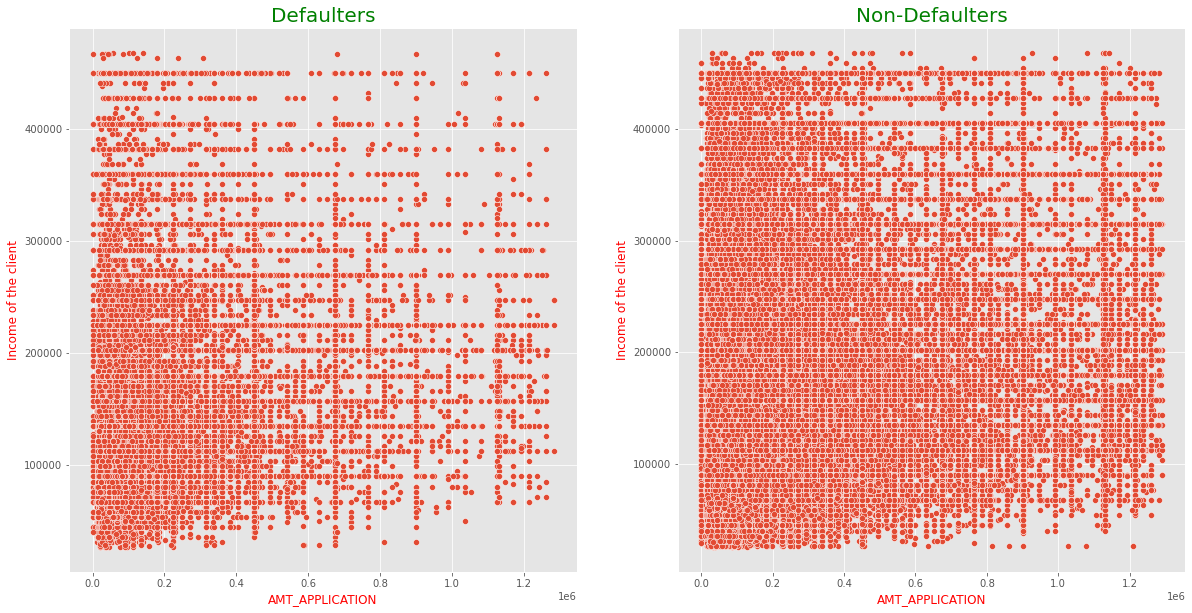

In [80]:
# Analysing the columns Income of the client(AMT_INCOME_TOTAL) and the credit client asked for on there previous application (AMT_APPLICATION) for both defaulters and non-defaulters

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.scatterplot(x = merged_data_defaulters["AMT_APPLICATION"], y = merged_data_defaulters["AMT_INCOME_TOTAL"])
plt.title("Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("AMT_APPLICATION", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Income of the client", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})

plt.subplot(1,2,2)
sns.scatterplot(x = merged_data_non_defaulters["AMT_APPLICATION"], y = merged_data_non_defaulters["AMT_INCOME_TOTAL"])
plt.title("Non-Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("AMT_APPLICATION", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Income of the client", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.show()

#### Analysis

Loan rejection rate is much lower if the income is higher than 500000. Also, loan requests higher than 200000 has a higher rejection rate

## Previous Credit term (Univariate Continuous)

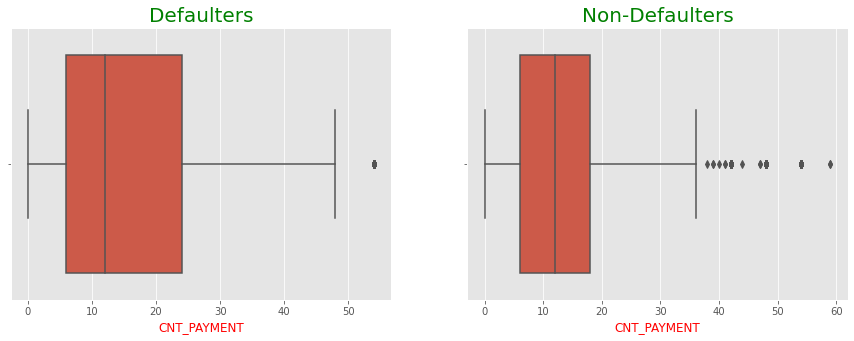

In [81]:
# Analysing the Term of previous credit at application of the previous application (CNT_PAYMENT) for both defaulters and non-defaulters by CNT_PAYMENT

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(x = merged_data_defaulters["CNT_PAYMENT"])
plt.title("Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("CNT_PAYMENT", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})

plt.subplot(1,2,2)
sns.boxplot(x = merged_data_non_defaulters["CNT_PAYMENT"])
plt.title("Non-Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("CNT_PAYMENT", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.show()

In [82]:
# Percentile of CNT_PAYMENT for non-defaulters

merged_data_non_defaulters["CNT_PAYMENT"].quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50    12.0
0.70    15.0
0.90    30.0
0.95    36.0
0.99    48.0
Name: CNT_PAYMENT, dtype: float64

In [83]:
# Percentile of CNT_PAYMENT for defaulters

merged_data_defaulters["CNT_PAYMENT"].quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50    12.0
0.70    18.0
0.90    36.0
0.95    48.0
0.99    48.0
Name: CNT_PAYMENT, dtype: float64

### Analysis

1. 75 percentile for defaulters is more than that of non defaulters for CNT_PAYMENT
2. The Maximum line for the Defaulters is more than that of the non-defaulters for CNT_PAYMENT
3. For those who had lower CNT_PAYMENT in previous application, cases of default are higher

## Goods category (Univariate Categorical)

In [84]:
# Filling missing value

merged_data['NAME_GOODS_CATEGORY'].fillna(merged_data["NAME_GOODS_CATEGORY"].mode()[0], inplace=True)

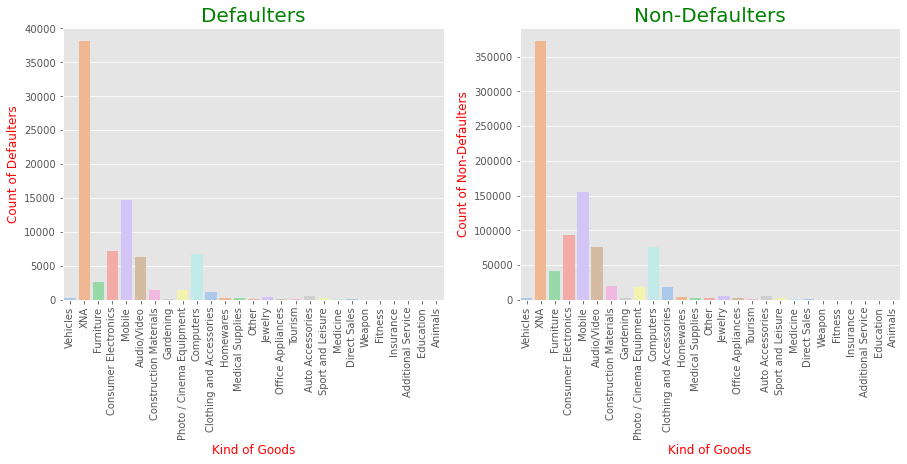

In [85]:
# Analysing the kind of goods did the client apply for in the previous application (NAME_GOODS_CATEGORY) for both defaulters and non-defaulters

order_occup = merged_data["NAME_GOODS_CATEGORY"].unique()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x = merged_data_defaulters["NAME_GOODS_CATEGORY"], order = order_occup, palette = 'pastel')
plt.xticks(rotation = 90)
plt.title("Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("Kind of Goods", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Count of Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})

plt.subplot(1,2,2)
sns.countplot(x = merged_data_non_defaulters["NAME_GOODS_CATEGORY"], order = order_occup, palette =  'pastel')
plt.xticks(rotation = 90)
plt.title("Non-Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("Kind of Goods", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Count of Non-Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.show()

In [86]:
# Finding out the percentage value of all the Defaulters

defaulters_percentage(merged_data, "NAME_GOODS_CATEGORY")

,Value,Percentage of Defaulter
23,Insurance,10.526316
0,Vehicles,10.061751
1,XNA,9.165566
17,Auto Accessories,9.135593
14,Jewelry,9.083744
4,Mobile,8.671627
15,Office Appliances,8.285565
20,Direct Sales,8.256881
21,Weapon,8.196721
9,Computers,8.136426


#### Analysis
People who had previously applied for Insurance and Vehicles have the highest percentage of defaulting cases 

## Portfolio (Univariate Categorical)

In [87]:
# Filling missing value

merged_data['NAME_PORTFOLIO'].fillna(merged_data["NAME_PORTFOLIO"].mode()[0], inplace=True)

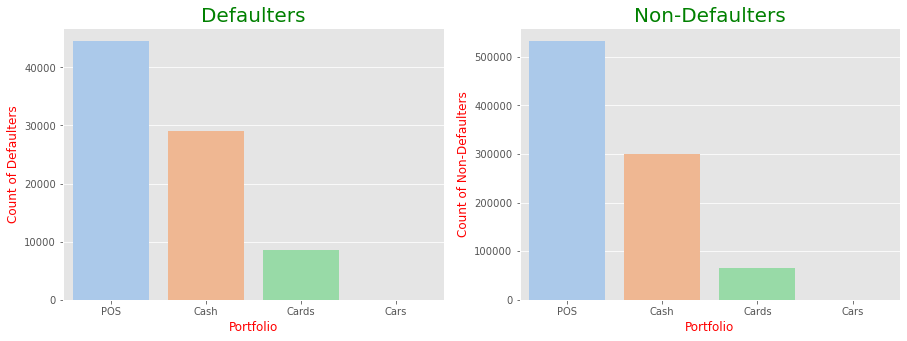

In [88]:
# Analysing the Portfolio of the previous Application (NAME_PORTFOLIO) for both defaulters and non-defaulters

order_occup = merged_data["NAME_PORTFOLIO"].unique()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x = merged_data_defaulters["NAME_PORTFOLIO"], order = order_occup, palette = 'pastel')
plt.title("Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("Portfolio", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Count of Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})

plt.subplot(1,2,2)
sns.countplot(x = merged_data_non_defaulters["NAME_PORTFOLIO"], order = order_occup, palette =  'pastel')
plt.title("Non-Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("Portfolio", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Count of Non-Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.show()

In [89]:
# Finding out the percentage value of all the Defaulters

defaulters_percentage(merged_data, "NAME_PORTFOLIO")

,Value,Percentage of Defaulter
2,Cards,11.427467
1,Cash,8.848716
0,POS,7.673335
3,Cars,1.298701


#### Analysis
The defaulter rate is highest where the previous application was for Cards

## Walk-in or X-sell (Univariate Categorical)

In [90]:
# Filling missing value

merged_data['NAME_PRODUCT_TYPE'].fillna(merged_data["NAME_PRODUCT_TYPE"].mode()[0], inplace=True)

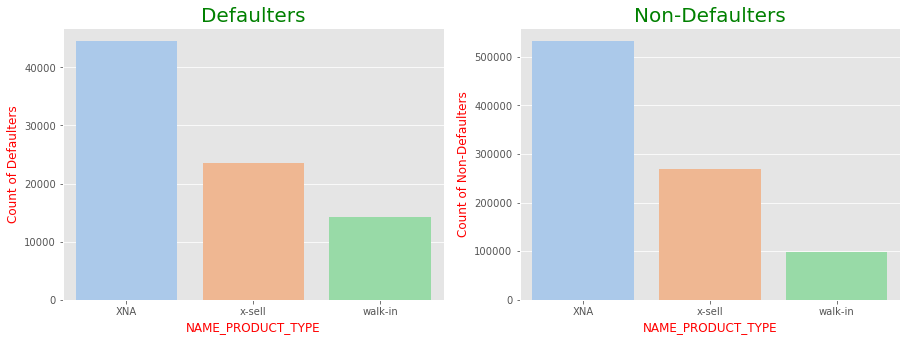

In [91]:
# Checking the column NAME_PRODUCT_TYPE for both defaulters and non-defaulters

order_occup = merged_data["NAME_PRODUCT_TYPE"].unique()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x = merged_data_defaulters["NAME_PRODUCT_TYPE"], order = order_occup, palette = 'pastel')
plt.title("Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("NAME_PRODUCT_TYPE", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Count of Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})

plt.subplot(1,2,2)
sns.countplot(x = merged_data_non_defaulters["NAME_PRODUCT_TYPE"], order = order_occup, palette =  'pastel')
plt.title("Non-Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("NAME_PRODUCT_TYPE", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Count of Non-Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.show()

In [92]:
# Finding out the percentage value of all the Defaulters

defaulters_percentage(merged_data, "NAME_PRODUCT_TYPE")

,Value,Percentage of Defaulter
2,walk-in,12.651404
1,x-sell,8.052496
0,XNA,7.672509


#### Analysis
Out of all the previous applicants, walk-ins have defaulted 12% in current loan

## Channel type (Univariate Categorical)

In [93]:
# Filling missing value

merged_data['CHANNEL_TYPE'].fillna(merged_data["CHANNEL_TYPE"].mode()[0], inplace=True)

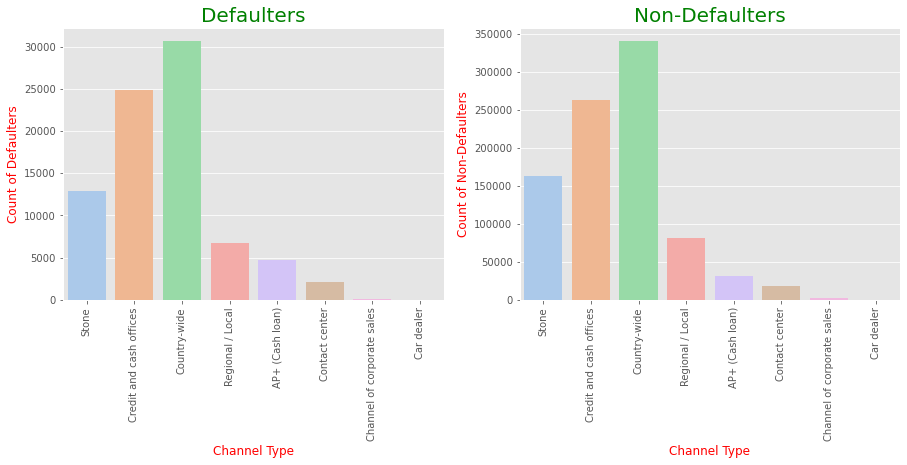

In [94]:
# Analysing the channel client was acquired for the previous application (CHANNEL_TYPE) for both defaulters and non-defaulters

order_occup = merged_data["CHANNEL_TYPE"].unique()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x = merged_data_defaulters["CHANNEL_TYPE"], order = order_occup, palette = 'pastel')
plt.xticks(rotation = 90)
plt.title("Defaulters", fontdict =  {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("Channel Type", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Count of Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})

plt.subplot(1,2,2)
sns.countplot(x = merged_data_non_defaulters["CHANNEL_TYPE"], order = order_occup, palette = 'pastel')
plt.xticks(rotation = 90)
plt.title("Non-Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("Channel Type", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Count of Non-Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.show()

In [95]:
# Finding out the percentage value of all the Defaulters

defaulters_percentage(merged_data, "CHANNEL_TYPE")

,Value,Percentage of Defaulter
4,AP+ (Cash loan),12.972059
5,Contact center,10.760473
1,Credit and cash offices,8.641387
2,Country-wide,8.173713
3,Regional / Local,7.692308
0,Stone,7.379731
6,Channel of corporate sales,4.420073
7,Car dealer,0.990099


#### Analysis
13% loan applicants defaulted in the current application who were acquired via channel AP+ (Cash Loan) in their previous application

##  Industry (Univariate Categorical)

In [96]:
# Filling missing value

merged_data['NAME_SELLER_INDUSTRY'].fillna(merged_data["NAME_SELLER_INDUSTRY"].mode()[0], inplace=True)

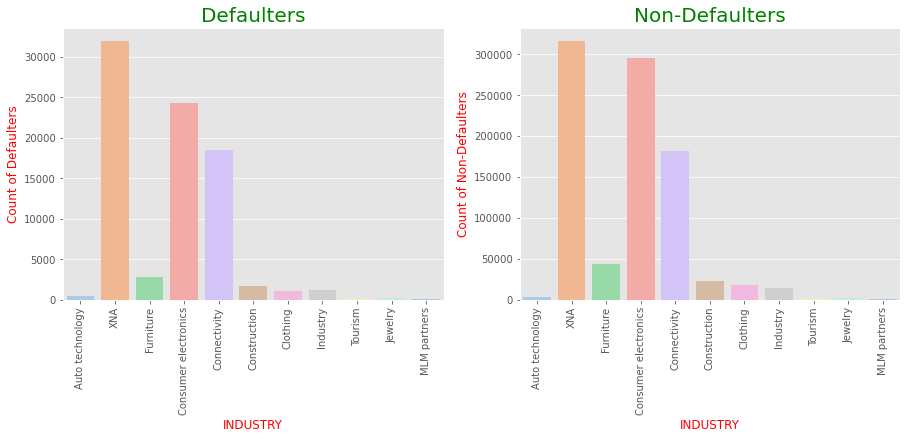

In [97]:
# Analysing the industry of the seller (NAME_SELLER_INDUSTRY) for both defaulters and non-defaulters

order_occup = merged_data["NAME_SELLER_INDUSTRY"].unique()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x = merged_data_defaulters["NAME_SELLER_INDUSTRY"], order = order_occup, palette = 'pastel')
plt.xticks(rotation = 90)
plt.title("Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("INDUSTRY", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Count of Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})

plt.subplot(1,2,2)
sns.countplot(x = merged_data_non_defaulters["NAME_SELLER_INDUSTRY"], order = order_occup, palette = 'pastel')
plt.xticks(rotation = 90)
plt.title("Non-Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("INDUSTRY", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Count of Non-Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.show()

In [98]:
# Finding out the percentage value of all the Defaulters

defaulters_percentage(merged_data, "NAME_SELLER_INDUSTRY")

,Value,Percentage of Defaulter
0,Auto technology,10.556962
4,Connectivity,9.229818
1,XNA,9.043185
9,Jewelry,8.860153
3,Consumer electronics,7.621758
7,Industry,7.291201
5,Construction,6.638315
2,Furniture,6.106690
6,Clothing,5.859149
10,MLM partners,5.205479


#### Analysis
In seller Industry Auto technology has the highest defaulting rate & Tourism has the lowest number of defaulters

## Product combination (Univariate Categorical)

In [99]:
# Filling missing value

merged_data['PRODUCT_COMBINATION'].fillna(merged_data["PRODUCT_COMBINATION"].mode()[0], inplace=True)

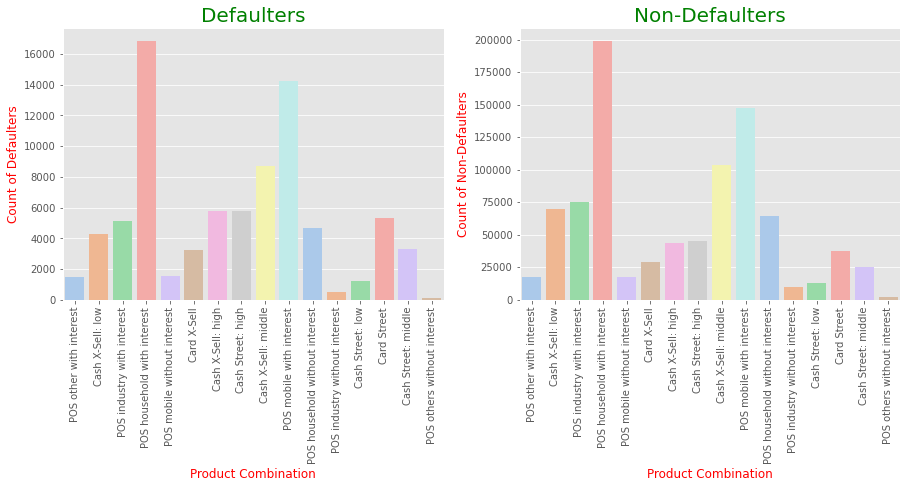

In [100]:
# Checking for both defaulter and non-defaulter there product combination of the previous application

order_occup = merged_data["PRODUCT_COMBINATION"].unique()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x = merged_data_defaulters["PRODUCT_COMBINATION"], order = order_occup, palette = 'pastel')
plt.xticks(rotation = 90)
plt.title("Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("Product Combination", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Count of Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})

plt.subplot(1,2,2)
sns.countplot(x = merged_data_non_defaulters["PRODUCT_COMBINATION"], order = order_occup, palette = 'pastel')
plt.xticks(rotation = 90)
plt.title("Non-Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 15, 'color' : 'Green'})
plt.xlabel("Product Combination", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.ylabel("Count of Non-Defaulters", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Red'})
plt.show()

In [101]:
# Finding out the percentage value of all the Defaulters

defaulters_percentage(merged_data, "PRODUCT_COMBINATION")

,Value,Percentage of Defaulter
13,Card Street,12.547323
14,Cash Street: middle,11.790563
6,Cash X-Sell: high,11.586780
7,Cash Street: high,11.421861
5,Card X-Sell,9.963417
9,POS mobile with interest,8.816905
12,Cash Street: low,8.544237
0,POS other with interest,7.992753
4,POS mobile without interest,7.945716
8,Cash X-Sell: middle,7.760591


#### Analysis
Highest percentage of defaulting cases is for Card Street

## Correlation

### Application Data Non-Defaulters

In [102]:
# Taking numeric columns from application_data non_defaulters 

numeric_columns = []
for columns in non_defaulters.columns:
    if non_defaulters[columns].dtype == float or non_defaulters[columns].dtype == int:
        numeric_columns.append(columns)
        
print(numeric_columns)

['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


In [103]:
# Numeric columns data types

non_defaulters[numeric_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273926 entries, 1 to 307510
Data columns (total 27 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   AMT_INCOME_TOTAL              273926 non-null  float64
 1   AMT_CREDIT                    273926 non-null  float64
 2   AMT_ANNUITY                   273926 non-null  float64
 3   AMT_GOODS_PRICE               273671 non-null  float64
 4   REGION_POPULATION_RELATIVE    273926 non-null  float64
 5   DAYS_REGISTRATION             273926 non-null  float64
 6   CNT_FAM_MEMBERS               273924 non-null  float64
 7   EXT_SOURCE_2                  273329 non-null  float64
 8   EXT_SOURCE_3                  220256 non-null  float64
 9   YEARS_BEGINEXPLUATATION_AVG   140721 non-null  float64
 10  FLOORSMAX_AVG                 138027 non-null  float64
 11  YEARS_BEGINEXPLUATATION_MODE  140721 non-null  float64
 12  FLOORSMAX_MODE                138027 non-nul

In [104]:
# Showing Correlation

non_defaulters[numeric_columns].corr()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
AMT_INCOME_TOTAL,1.000000,0.364425,0.442343,0.368136,0.173586,-0.076041,0.036526,0.157675,-0.092735,0.014485,...,-0.028237,-0.024192,-0.028882,0.059946,0.002247,0.004134,0.007481,0.066433,0.020013,0.060266
AMT_CREDIT,0.364425,1.000000,0.774697,0.984967,0.074476,-0.007248,0.065097,0.112453,0.029951,0.000341,...,-0.015357,0.004658,-0.017983,0.077193,-0.004694,0.003009,-0.002924,0.048797,0.020627,-0.035198
AMT_ANNUITY,0.442343,0.774697,1.000000,0.775265,0.094390,-0.037065,0.078882,0.110613,0.016530,0.008716,...,-0.017246,-0.005992,-0.018581,0.067708,0.003613,0.001424,0.013049,0.033360,0.013089,0.002289
AMT_GOODS_PRICE,0.368136,0.984967,0.775265,1.000000,0.078049,-0.009622,0.063520,0.119867,0.032718,0.001403,...,-0.016530,0.005124,-0.018929,0.080225,-0.003909,0.003331,-0.002742,0.050828,0.021191,-0.037641
REGION_POPULATION_RELATIVE,0.173586,0.074476,0.094390,0.078049,1.000000,0.053058,-0.024867,0.190606,-0.010803,-0.008019,...,0.009471,-0.006666,0.005664,0.043194,-0.001757,0.001747,-0.003038,0.076515,-0.000353,0.006079
DAYS_REGISTRATION,-0.076041,-0.007248,-0.037065,-0.009622,0.053058,1.000000,-0.176852,0.053887,0.104783,-0.010891,...,-0.001802,-0.008546,-0.003167,0.052673,0.003588,-0.000028,0.001295,0.012016,0.000362,0.025767
CNT_FAM_MEMBERS,0.036526,0.065097,0.078882,0.063520,-0.024867,-0.176852,1.000000,-0.001790,-0.028162,0.007252,...,-0.003738,0.024170,-0.005372,0.028714,0.000098,0.000136,-0.000822,-0.008415,-0.004345,-0.029773
EXT_SOURCE_2,0.157675,0.112453,0.110613,0.119867,0.190606,0.053887,-0.001790,1.000000,0.084251,0.006023,...,-0.026204,-0.019222,-0.028432,0.189880,-0.003398,0.000941,0.001036,0.049277,-0.002549,-0.018463
EXT_SOURCE_3,-0.092735,0.029951,0.016530,0.032718,-0.010803,0.104783,-0.028162,0.084251,1.000000,-0.001716,...,-0.032912,0.001498,-0.031395,0.068972,-0.001778,-0.007961,-0.020653,-0.008829,-0.024484,-0.070196
YEARS_BEGINEXPLUATATION_AVG,0.014485,0.000341,0.008716,0.001403,-0.008019,-0.010891,0.007252,0.006023,-0.001716,1.000000,...,-0.002711,0.000668,-0.001542,-0.003882,0.000871,-0.002821,0.003586,-0.001163,0.001826,-0.008808


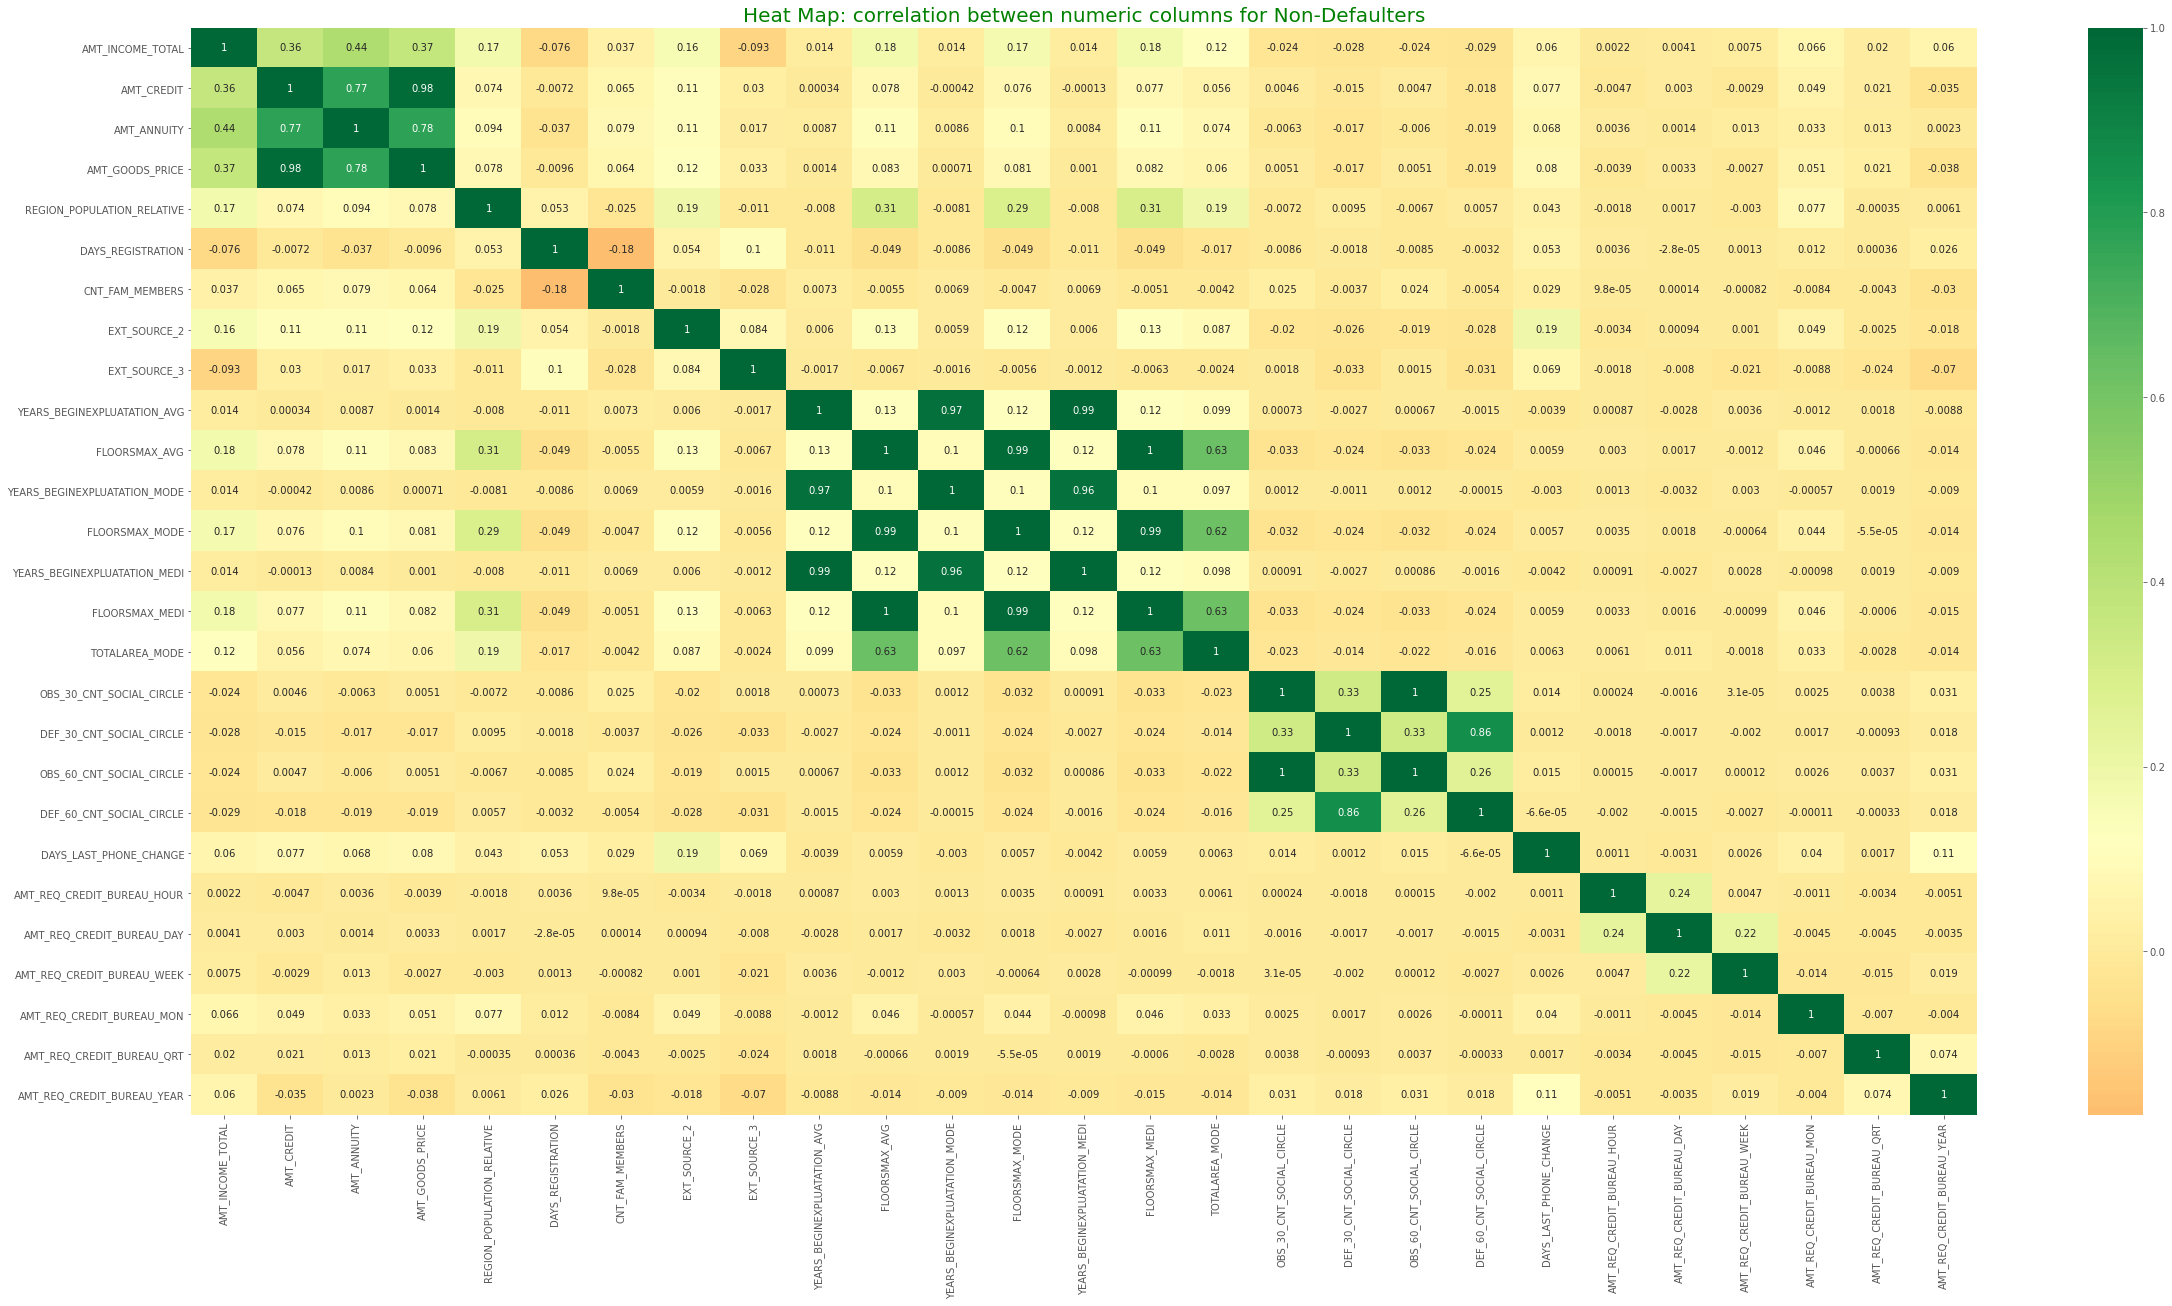

In [105]:
# Heat Map: correlation between numeric columns for Non-Defaulters

plt.figure(figsize=(40,20))
sns.heatmap(non_defaulters[numeric_columns].corr(), annot = True, cmap = "RdYlGn", center = 0.118)
plt.title("Heat Map: correlation between numeric columns for Non-Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

In [106]:
# Listing the correlations in pair sorted in descending order

non_defaulters_corr = non_defaulters.corr()
round(non_defaulters_corr, 2)

corr_list = non_defaulters_corr.unstack()
corr_list.sort_values(ascending = False).drop_duplicates().head(10)

AMT_REQ_CREDIT_BUREAU_YEAR    AMT_REQ_CREDIT_BUREAU_YEAR      1.000000
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998514
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.997054
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.993574
FLOORSMAX_MEDI                FLOORSMAX_MODE                  0.988343
FLOORSMAX_AVG                 FLOORSMAX_MODE                  0.985762
AMT_CREDIT                    AMT_GOODS_PRICE                 0.984967
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_AVG     0.971761
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE    0.963012
REGION_RATING_CLIENT          REGION_RATING_CLIENT_W_CITY     0.950035
dtype: float64

### Application Data Defaulters

In [107]:
# Taking numeric value from application_data defaulters 

numeric_columns = []
for columns in defaulters.columns:
    if defaulters[columns].dtype == float or defaulters[columns].dtype == int:
        numeric_columns.append(columns)
        
print(numeric_columns)

['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


In [108]:
# Numeric columns data types

defaulters[numeric_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24413 entries, 0 to 307509
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AMT_INCOME_TOTAL              24413 non-null  float64
 1   AMT_CREDIT                    24413 non-null  float64
 2   AMT_ANNUITY                   24413 non-null  float64
 3   AMT_GOODS_PRICE               24392 non-null  float64
 4   REGION_POPULATION_RELATIVE    24413 non-null  float64
 5   DAYS_REGISTRATION             24413 non-null  float64
 6   CNT_FAM_MEMBERS               24413 non-null  float64
 7   EXT_SOURCE_2                  24361 non-null  float64
 8   EXT_SOURCE_3                  18829 non-null  float64
 9   YEARS_BEGINEXPLUATATION_AVG   10775 non-null  float64
 10  FLOORSMAX_AVG                 10526 non-null  float64
 11  YEARS_BEGINEXPLUATATION_MODE  10775 non-null  float64
 12  FLOORSMAX_MODE                10526 non-null  float64
 13  

In [109]:
# Showing Correlation

defaulters[numeric_columns].corr()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
AMT_INCOME_TOTAL,1.000000,0.329179,0.407446,0.330012,0.110260,-0.036898,0.005855,0.134783,-0.065694,0.010298,...,-0.021396,-0.000845,-0.022356,0.083506,0.010029,0.000322,0.012605,0.066001,0.019110,0.075431
AMT_CREDIT,0.329179,1.000000,0.746939,0.981048,0.065449,0.028993,0.055221,0.111768,0.083247,0.002623,...,-0.026616,0.022734,-0.031471,0.109670,-0.005711,0.003927,0.005922,0.050333,-0.015089,-0.023909
AMT_ANNUITY,0.407446,0.746939,1.000000,0.744676,0.060901,-0.038009,0.080612,0.104567,0.039957,-0.002891,...,-0.021094,0.010637,-0.026381,0.076210,0.013440,-0.002551,0.032218,0.051316,-0.009833,-0.003820
AMT_GOODS_PRICE,0.330012,0.981048,0.744676,1.000000,0.073159,0.028896,0.051626,0.122793,0.084571,0.001620,...,-0.022356,0.023961,-0.026558,0.118110,-0.004178,0.005119,0.006228,0.054262,-0.013307,-0.025485
REGION_POPULATION_RELATIVE,0.110260,0.065449,0.060901,0.073159,1.000000,0.055983,-0.030638,0.165508,-0.007504,-0.017462,...,0.027659,0.009909,0.019864,0.055674,-0.000249,-0.007928,0.001876,0.072309,-0.007429,0.002236
DAYS_REGISTRATION,-0.036898,0.028993,-0.038009,0.028896,0.055983,1.000000,-0.146269,0.070117,0.085265,-0.000236,...,-0.011120,-0.014535,-0.010330,0.069703,0.003531,0.008637,-0.002811,-0.004558,0.013991,0.014401
CNT_FAM_MEMBERS,0.005855,0.055221,0.080612,0.051626,-0.030638,-0.146269,1.000000,0.002604,-0.019619,0.002602,...,0.006687,0.044276,-0.000066,0.014071,0.000925,-0.018608,-0.010449,-0.009957,-0.013142,-0.012148
EXT_SOURCE_2,0.134783,0.111768,0.104567,0.122793,0.165508,0.070117,0.002604,1.000000,0.078696,0.016051,...,-0.010244,0.018896,-0.011174,0.208076,-0.004982,-0.005850,0.002527,0.049230,-0.007246,0.002870
EXT_SOURCE_3,-0.065694,0.083247,0.039957,0.084571,-0.007504,0.085265,-0.019619,0.078696,1.000000,-0.008226,...,-0.021338,-0.008128,-0.013677,0.066423,0.003327,0.004598,-0.021626,-0.018658,-0.049072,-0.054815
YEARS_BEGINEXPLUATATION_AVG,0.010298,0.002623,-0.002891,0.001620,-0.017462,-0.000236,0.002602,0.016051,-0.008226,1.000000,...,-0.020730,-0.007981,-0.026229,0.001364,-0.003593,0.008088,0.002989,-0.000494,0.006989,0.000289


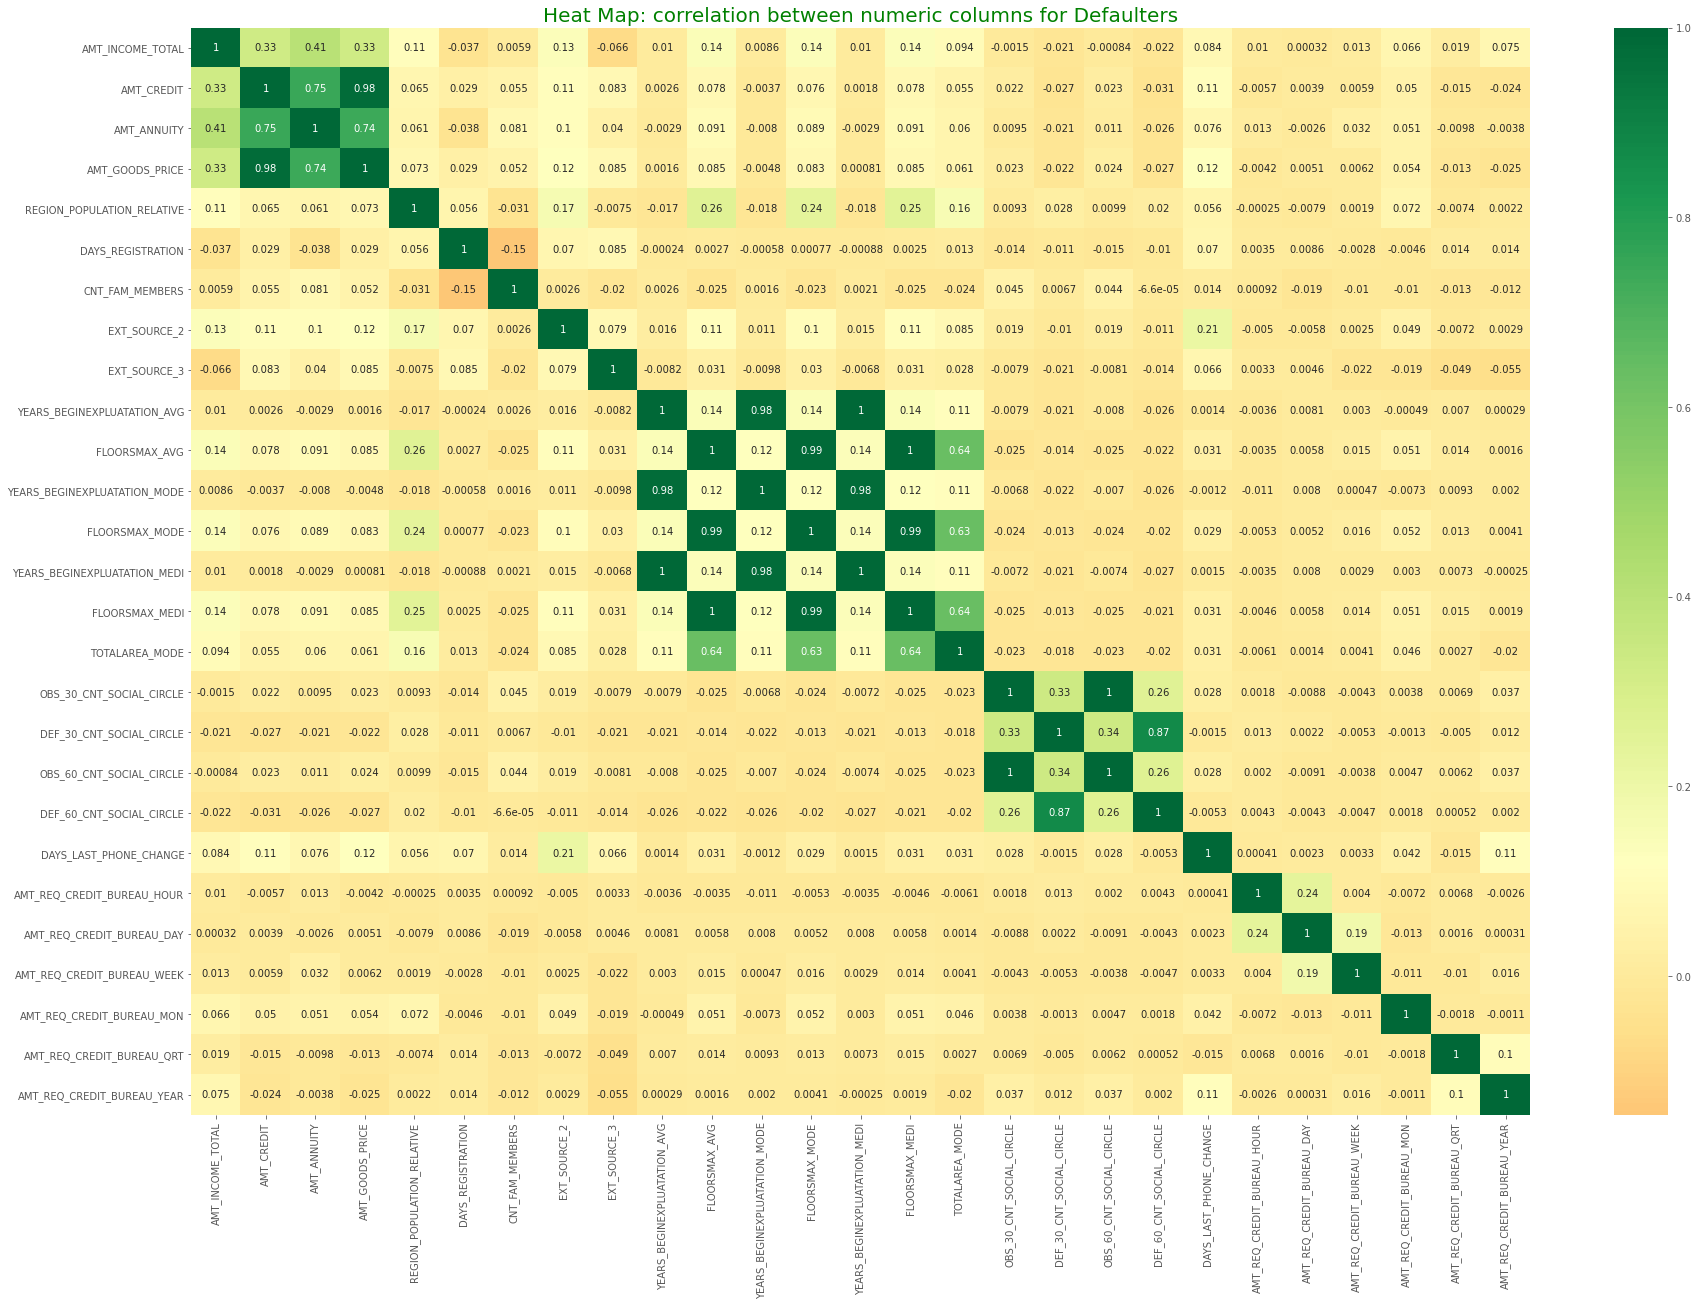

In [110]:
# Heat Map: correlation between numeric columns for Defaulters

plt.figure(figsize=(30,20))
sns.heatmap(defaulters[numeric_columns].corr(), annot = True, cmap = "RdYlGn", center = 0.118)
plt.title("Heat Map: correlation between numeric columns for Defaulters", fontdict = {'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

In [111]:
# Listing the correlations in pair sorted in descending order

defaulters_corr = defaulters.corr()
round(defaulters_corr, 2)

corr_list = defaulters_corr.unstack()
corr_list.sort_values(ascending = False).drop_duplicates().head(10)

AMT_REQ_CREDIT_BUREAU_YEAR    AMT_REQ_CREDIT_BUREAU_YEAR      1.000000
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998264
FLOORSMAX_MEDI                FLOORSMAX_AVG                   0.997222
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.996122
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.989478
FLOORSMAX_AVG                 FLOORSMAX_MODE                  0.986817
AMT_CREDIT                    AMT_GOODS_PRICE                 0.981048
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_AVG     0.980465
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE    0.978071
REGION_RATING_CLIENT_W_CITY   REGION_RATING_CLIENT            0.957584
dtype: float64

#### Analysis

##### Top 10 Correlations for Non-Defaulters

1. AMT_REQ_CREDIT_BUREAU_YEAR, AMT_REQ_CREDIT_BUREAU_YEAR
2. OBS_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE
3. FLOORSMAX_AVG, FLOORSMAX_MEDI 
4. YEARS_BEGINEXPLUATATION_MEDI, YEARS_BEGINEXPLUATATION_AVG
5. FLOORSMAX_MEDI, FLOORSMAX_MODE
6. FLOORSMAX_AVG, FLOORSMAX_MODE
7. AMT_CREDIT, AMT_GOODS_PRICE
8. YEARS_BEGINEXPLUATATION_MODE, YEARS_BEGINEXPLUATATION_AVG
9. YEARS_BEGINEXPLUATATION_MEDI, YEARS_BEGINEXPLUATATION_MODE
10. REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY

##### Top 10 Correlations for Defaulters

1. AMT_REQ_CREDIT_BUREAU_YEAR, AMT_REQ_CREDIT_BUREAU_YEAR
2. OBS_60_CNT_SOCIAL_CIRCLE, OBS_30_CNT_SOCIAL_CIRCLE
3. FLOORSMAX_MEDI, FLOORSMAX_AVG
4. YEARS_BEGINEXPLUATATION_AVG, YEARS_BEGINEXPLUATATION_MEDI
5. FLOORSMAX_MODE, FLOORSMAX_MEDI  
6. FLOORSMAX_AVG, FLOORSMAX_MODE 
7. AMT_CREDIT, AMT_GOODS_PRICE
8. YEARS_BEGINEXPLUATATION_MODE, YEARS_BEGINEXPLUATATION_AVG
9. YEARS_BEGINEXPLUATATION_MEDI, YEARS_BEGINEXPLUATATION_MODE
10. REGION_RATING_CLIENT_W_CITY, REGION_RATING_CLIENT

### Previous Application

In [112]:
# Taking numeric value from previous_application 

numeric_columns = []
for columns in prev.columns:
    if prev[columns].dtype == float or prev[columns].dtype == int:
        numeric_columns.append(columns)
        
print(numeric_columns)

['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


In [113]:
# numeric columns data types

prev[numeric_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1181683 entries, 0 to 1670213
Data columns (total 11 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   AMT_ANNUITY                1181679 non-null  float64
 1   AMT_APPLICATION            1181683 non-null  float64
 2   AMT_CREDIT                 1181683 non-null  float64
 3   AMT_GOODS_PRICE            1181683 non-null  float64
 4   CNT_PAYMENT                1181683 non-null  float64
 5   DAYS_FIRST_DRAWING         935558 non-null   float64
 6   DAYS_FIRST_DUE             935558 non-null   float64
 7   DAYS_LAST_DUE_1ST_VERSION  935558 non-null   float64
 8   DAYS_LAST_DUE              935558 non-null   float64
 9   DAYS_TERMINATION           935558 non-null   float64
 10  NFLAG_INSURED_ON_APPROVAL  935558 non-null   float64
dtypes: float64(11)
memory usage: 108.2 MB


In [114]:
# Checking correlation between numeric columns of previous_application

prev[numeric_columns].corr()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
AMT_ANNUITY,1.000000,0.840588,0.833768,0.840658,0.326441,0.045875,-0.072509,-0.077961,0.060750,0.060586,0.297581
AMT_APPLICATION,0.840588,1.000000,0.990334,0.999735,0.570375,-0.047016,-0.011921,0.040906,0.200830,0.197866,0.270560
AMT_CREDIT,0.833768,0.990334,1.000000,0.990478,0.608137,-0.036900,-0.017964,0.028936,0.203241,0.200622,0.309366
AMT_GOODS_PRICE,0.840658,0.999735,0.990478,1.000000,0.570096,-0.047016,-0.011921,0.040906,0.200830,0.197866,0.270560
CNT_PAYMENT,0.326441,0.570375,0.608137,0.570096,1.000000,0.253219,-0.199184,-0.329077,0.099738,0.099426,0.314219
DAYS_FIRST_DRAWING,0.045875,-0.047016,-0.036900,-0.047016,0.253219,1.000000,-0.032957,-0.756514,-0.295495,-0.332329,0.131606
DAYS_FIRST_DUE,-0.072509,-0.011921,-0.017964,-0.011921,-0.199184,-0.032957,1.000000,0.571113,0.384165,0.332416,-0.101815
DAYS_LAST_DUE_1ST_VERSION,-0.077961,0.040906,0.028936,0.040906,-0.329077,-0.756514,0.571113,1.000000,0.440137,0.433083,-0.172646
DAYS_LAST_DUE,0.060750,0.200830,0.203241,0.200830,0.099738,-0.295495,0.384165,0.440137,1.000000,0.966741,0.032151
DAYS_TERMINATION,0.060586,0.197866,0.200622,0.197866,0.099426,-0.332329,0.332416,0.433083,0.966741,1.000000,0.033293


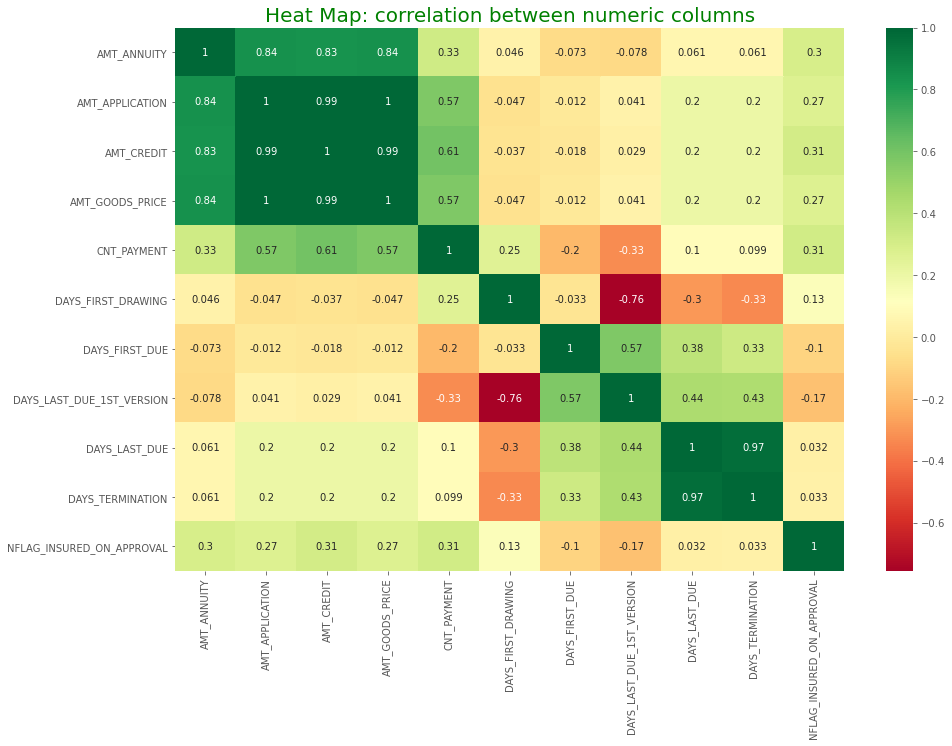

In [115]:
# Heat Map: correlation between numeric columns

plt.figure(figsize=(15,10))
sns.heatmap(prev[numeric_columns].corr(), annot = True, cmap = "RdYlGn", center = 0.118)
plt.title("Heat Map: correlation between numeric columns", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

#### Analysis
1. 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT' & 'AMT_GOODS_PRICE' are highly correlated
2. 'DAYS_TERMINATION' & 'DAYS_LAST_DUE' are also highly correlated
3. 'DAYS_LAST_DUE_1st_VERSION' & 'DAYS_FIRST_DRAWING' have a high negative correlation

## Summary:

_1. Number of defaulters in the total population is very less which makes the data highly imbalanced. The ratio of defaulters to non-defaulters is 2:23_

_2. Large number of people stay in House / apartment and very few stay in Co-op apartment. People staying in Rented apartment and with parents have the highest chance of being defaulters whereas people staying in Office apartment have the least chance of defaulting_

_3. The Social Circle columns have a similar trend for defaulters as well as non-defaulters. Hence, no inference / conclusion can be made through these columns_

_4. Apart from Document_3, majority of the applicants did not submit any other documents. However, the document_3 submission also follows a similar trend for defaulters as well as non-defaulters. Hence, no inference / conclusion can be made through it_

_5. More number of Non-Defaulters own cars & Houses/Flat compared to defaulters. Hence, it can be concluded that people not owning realty and cars have a slightly higher defaulting rate than the people who own realty and cars_

_6. People with more number of children and more number of family members have higher defaulting percentage. Also, Civil Marriage and Single/not married people have the highest defaulters rate_

_7. People who had previously applied for Insurance and Vehicles have the highest percentage of defaulting cases_

_8.	The defaulter rate is highest where the previous application was for Cards_

_9.	Out of all the previous applicants, walk-ins have defaulted 12% in current loan_

_10.	13% loan applicants defaulted in the current application who were acquired via channel AP+ (Cash Loan) in their previous application_

_11.	In seller Industry, Auto technology has the highest defaulting rate & Tourism has the lowest number of defaulters_

_12.	Highest percentage of defaulting cases is for Card Street_

_13. Unemployed people and people on Maternity Leave have the highest defaulting percentage whereas Students & Businessmen have the least defaulting percentage_

_14. People with Lower secondary as their education have the highest defaulting percentage whereas people with Academic degree have the least defaulting percentage_

_15. Low-skill Laborers have highest defaulting percentage whereas Accountants have the least defaulting percentage_

_16. Males have a higher defaulting percentage compared to female applicants_

_17. People around the age of 30 years have the highest defaulting rate and the defaulting rate reduces as the age crosses 30 years_

_18. For lower range of credit amount and goods price, the number of defaulters is less than that of non-defaulters_

_19. Defaulter rate is highest when the permanent address is same as the working address_

_20. The percentage of applicants whose current loan defaulted but their previous loans were approved is very less which means that these applicants are more likely to pay their current loan in time than the applicants whose previous loans were refused_